# Data preprocessing

Importing the data into dataframe.

In [3]:
import pandas as pd

df = pd.read_csv("vdjdb.txt", sep='\t')

Check null values

In [4]:
#df

In [5]:
#df.isnull().sum()

In [6]:
df= df[['complex.id','gene','cdr3','v.segm','j.segm','species','mhc.class','antigen.species','antigen.epitope','vdjdb.score']]

Rename the columns

In [7]:
df = df.rename(columns={"complex.id": "ComplexID","gene": "Gene","cdr3": "CDR3", "v.segm": "V","j.segm": "J","species": "Species","mhc.class": "MHCclass"
                  ,"antigen.species": "EpitopeSpecies","antigen.epitope": "Epitope","vdjdb.score": "Score"})

In [8]:
len(df)

92771

Check how many records that have zero score.

In [9]:
df_z = df[df['Score'] == 0]

In [10]:
len(df_z)

80357

Only take the records that has score not equal to zero.

In [11]:
df = df[df['Score'] != 0]

In [12]:
len(df)

12414

Check null values.

In [13]:
df.isnull().sum()

ComplexID           0
Gene                0
CDR3                0
V                  28
J                 258
Species             0
MHCclass            0
EpitopeSpecies      0
Epitope             0
Score               0
dtype: int64

In [14]:
nan_values = df[df.isna().any(axis=1)]

nan_values

,ComplexID,Gene,CDR3,V,J,Species,MHCclass,EpitopeSpecies,Epitope,Score
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKEKGGL,2
14,7,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKEQGGL,2
21,10,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKETGGL,2
28,13,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKEMGGL,2
1209,0,TRB,CASSTGDHSNQPQHFG,TRBV27*01,NaN,HomoSapiens,MHCI,CMV,YSEHPTFTSQY,1
...,...,...,...,...,...,...,...,...,...,...
83753,0,TRA,CATNASSNTGKLI,NaN,NaN,MacacaMulatta,MHCI,SIV,TTPESANL,1
83757,0,TRA,CVLRAGGGYVLT,NaN,NaN,MacacaMulatta,MHCI,SIV,TTPESANL,1
88607,29453,TRA,CAASTGGQKLLF,TRAV13-1*01,NaN,HomoSapiens,MHCI,SARS-CoV-2,SPRWYFYYL,2
90002,0,TRA,CAVRDIRGQGFSFIF,TRAV3*01,NaN,HomoSapiens,MHCI,SARS-CoV-2,QYIKWPWYI,1


Drop null values.

In [15]:
df = df.dropna()
df.isnull().sum()

ComplexID         0
Gene              0
CDR3              0
V                 0
J                 0
Species           0
MHCclass          0
EpitopeSpecies    0
Epitope           0
Score             0
dtype: int64

In [16]:
len(df)

12156

Split the data into 3 subsets using specific columns. So we end up with three species (Human, Mouse, and Monkey).

In [17]:
unique_values = df['Species'].unique()

print(unique_values)

['HomoSapiens' 'MusMusculus' 'MacacaMulatta']


In [18]:
dfh = df[df['Species'] == 'HomoSapiens'] #human
dfm = df[df['Species'] == 'MusMusculus'] #mouse
dfmu = df[df['Species'] == 'MacacaMulatta'] #monkey

In [19]:
len(dfh)

9376

In [20]:
len(dfm)

2121

In [21]:
len(dfmu)

659

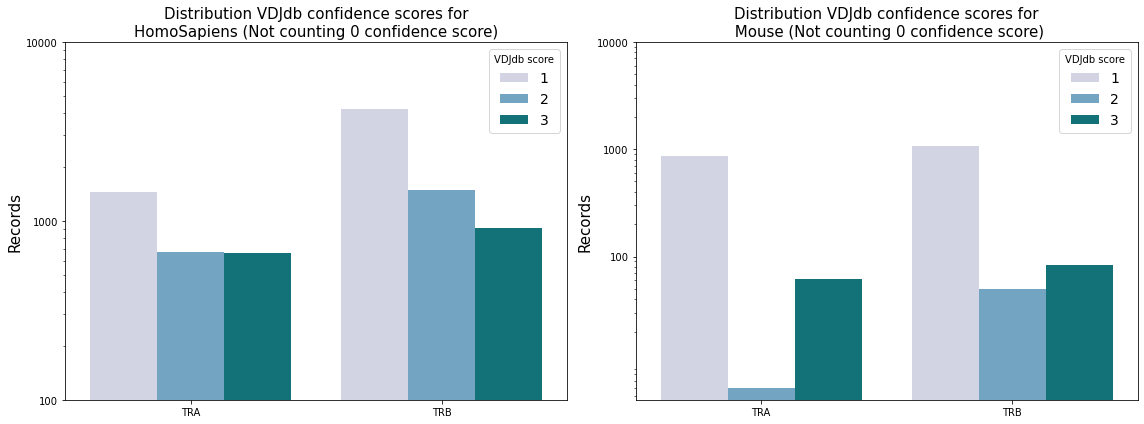

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_human = dfh.groupby(['Gene', 'Score']).size().reset_index(name='total')
df_mouse = dfm.groupby(['Gene', 'Score']).size().reset_index(name='total')
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=df_human, x='Gene', y='total', hue='Score', dodge=True, palette="PuBuGn", ax=axs[0])
axs[0].set_xlabel('')  
axs[0].set_ylabel('Records', fontsize=15)  
axs[0].set_yscale('log')
axs[0].legend(title='VDJdb score', loc='upper right',fontsize=14)
axs[0].set_title('Distribution VDJdb confidence scores for\nHomoSapiens (Not counting 0 confidence score)', fontsize=15)  # Set title font size

ticks = [100, 1000, 10000]
axs[0].set_yticks(ticks)
axs[0].set_yticklabels([f'{tick}' for tick in ticks])

sns.barplot(data=df_mouse, x='Gene', y='total', hue='Score', dodge=True, palette="PuBuGn", ax=axs[1])
axs[1].set_xlabel('')  
axs[1].set_ylabel('Records', fontsize=15)  
axs[1].set_yscale('log')
axs[1].legend(title='VDJdb score', loc='upper right',fontsize=14)
axs[1].set_title('Distribution VDJdb confidence scores for\n Mouse (Not counting 0 confidence score)', fontsize=15)  # Set title font size

axs[1].set_yticks(ticks)
axs[1].set_yticklabels([f'{tick}' for tick in ticks])

plt.tight_layout()
plt.show()


# Mouse Data Cleaning and Mesuring the distance.

In [23]:
dfm = dfm.dropna()

In [24]:
len(dfm)

2121

Split the mouse data frame into two sub-data frames. The first one contains the CDR3_alpha sequences and all affiliated data from other columns. The second one contains CDR3_beta sequences and all the associated data from other columns.

In [25]:
dfm_alpha = dfm[dfm['Gene'] == 'TRA']
dfm_beta = dfm[dfm['Gene'] == 'TRB']

In [26]:
dfm_alpha.reset_index(drop=True, inplace=True)
dfm_beta.reset_index(drop=True, inplace=True)

In [27]:
#dfm_alpha # TCRs of alpha chain mouse

In [28]:
len(dfm_beta)

1194

In [29]:
len(dfm_alpha)

927

# Mesure the distance for alpha and beta data frames (Mouse):

To measure the distance we only need the following columns (ComplexID, CDR3,V, J, and optionally Epitope). We also kept EpitopeSpecies column for further plotting (The aim is to plot the TCRs clusters and color them in terms of EpitopeSpecies)

In [30]:
dfm_alpha_distance = dfm_alpha.drop(columns=['Gene','Species','MHCclass','Score'])
dfm_beta_distance = dfm_beta.drop(columns=['Gene','Species','MHCclass','Score'])
dfm_alpha_distance = dfm_alpha_distance.dropna()
dfm_beta_distance = dfm_beta_distance.dropna()

In [31]:
dfm_alpha_distance.isnull().values.any()

False

In [32]:
dfm_beta_distance.isnull().values.any()

False

In [33]:
len(dfm_alpha_distance)

927

In [34]:
len(dfm_beta_distance)

1194

In [35]:
num_duplicated_rows = dfm_alpha_distance.duplicated().sum()
num_duplicated_rows

0

In [36]:
num_duplicated_rows = dfm_beta_distance.duplicated().sum()
num_duplicated_rows

140

TCRDist3 uses a special naming for colmuns to mesure the distance. So we need to rename the colmuns in way that can be interpreated by algorthim.

In [37]:
dfm_alpha_distance = dfm_alpha_distance.rename(columns={'CDR3': 'cdr3_a_aa', 'V': 'v_a_gene', 'J': 'j_a_gene','Epitope': 'epitope'})
dfm_beta_distance = dfm_beta_distance.rename(columns={'CDR3': 'cdr3_b_aa', 'V': 'v_b_gene', 'J': 'j_b_gene','Epitope': 'epitope'})

In [38]:
len(dfm_beta_distance)

1194

Adding count columns to the data frame. (PS: We need to keep the ComplexID column because it helps us prevent grouping two identical rows from two different donors into one row which will simply have a consequence when comes to calculating the distance. 

In [39]:
dfm_alpha_distance = dfm_alpha_distance.groupby(dfm_alpha_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})

In [40]:
dfm_beta_distance = dfm_beta_distance.groupby(dfm_beta_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})

In [41]:
dfm_beta_distance

,ComplexID,cdr3_b_aa,v_b_gene,j_b_gene,EpitopeSpecies,epitope,count
0,0,CASGAGTGYAEQFF,TRBV13-2*01,TRBJ2-1*01,RSV,SYIGSINNI,1
1,0,CASGDAGGDQDTQYF,TRBV13-2*01,TRBJ2-5*01,MCMV,SSPPMFRV,1
2,0,CASGDAGGGEQYF,TRBV13-2*01,TRBJ2-7*01,MCMV,SSPPMFRV,3
3,0,CASGDVQGDTLYF,TRBV13-2*01,TRBJ2-4*01,MCMV,RALEYKNL,1
4,0,CASGGGTGYAEQFF,TRBV13-2*01,TRBJ2-1*01,RSV,SYIGSINNI,1
...,...,...,...,...,...,...,...
1049,27103,CASSRANYEQYF,TRBV12-1*01,TRBJ2-7*01,GallusGallus,SIINFEKL,1
1050,27104,CASSRANYEQYF,TRBV12-1*01,TRBJ2-7*01,GallusGallus,SIINFEKL,1
1051,27247,CASASWGGYAEQFF,TRBV13-1*02,TRBJ2-1*01,HomoSapiens,VVVGAVGVGK,1
1052,27248,CASSRDWGPAEQFF,TRBV4*01,TRBJ2-1*01,HomoSapiens,VVGAVGVGK,1


# Distaince between alpha chains (Mouse)

To find the distance between TCRs we used the TCRdist3 algorithm. For this purpose, we measured the distance using three different
distance matrices. The first one is the default matrix of TCRdist3 which is pwseqdist. The second one is "pw.metrics.nw_hamming_metric"
a pairwise Needleman-Wunsch alignment followed by hamming distance. And the third one is "pw.metrics.nw_metric" a reciprocal Needleman-Wunsch alignment score-based dissimilarity using BLOSUM62

In [41]:
#Defult matrix "pwseqdist", this distance include also alpha chains that has no beta chains countrypart (complexID = 0)
from tcrdist.repertoire import TCRrep

tr_mouse_alpha_pwseqdist = TCRrep(cell_df = dfm_alpha_distance, 
            organism = 'mouse', 
            chains = ['alpha'], 
            compute_distances = True,
            db_file = 'alphabeta_gammadelta_db.tsv')

trm_alpha_pwseqdist = tr_mouse_alpha_pwseqdist.pw_alpha
trm_alpha_pwseqdist

array([[  0,  90, 128, ..., 128, 130,  98],
       [ 90,   0, 128, ..., 128, 145, 119],
       [128, 128,   0, ..., 107, 142, 161],
       ...,
       [128, 128, 107, ...,   0, 144, 158],
       [130, 145, 142, ..., 144,   0, 164],
       [ 98, 119, 161, ..., 158, 164,   0]], dtype=int16)

In [43]:
#pw.metrics.nw_hamming_metric, this distance include also alpha chains that has no beta chains countrypart (complexID = 0)
import pwseqdist as pw
import pandas as pd
from tcrdist.repertoire import TCRrep
import multiprocessing

tr_mouse_alpha_nw_hamming_metric = TCRrep(cell_df = dfm_alpha_distance, 
            organism = 'mouse', 
            chains = ['alpha'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_mouse_alpha_nw_hamming_metric.metrics_a = metrics_a
tr_mouse_alpha_nw_hamming_metric.metrics_b = metrics_b

tr_mouse_alpha_nw_hamming_metric.weights_a = weights_a
tr_mouse_alpha_nw_hamming_metric.weights_b = weights_b

tr_mouse_alpha_nw_hamming_metric.kargs_a = kargs_a 
tr_mouse_alpha_nw_hamming_metric.kargs_b = kargs_b

tr_mouse_alpha_nw_hamming_metric.compute_distances()

trm_alpha_hamming_metric = tr_mouse_alpha_nw_hamming_metric.pw_alpha
trm_alpha_hamming_metric

array([[ 0,  8, 25, ..., 25, 26, 12],
       [ 8,  0, 24, ..., 25, 26, 13],
       [25, 24,  0, ..., 20, 23, 29],
       ...,
       [25, 25, 20, ...,  0, 22, 27],
       [26, 26, 23, ..., 22,  0, 31],
       [12, 13, 29, ..., 27, 31,  0]])

In [44]:
#pw.metrics.nw_metric, this distance include also alpha chains that has no beta chains countrypart (complexID = 0)
import pwseqdist as pw
import pandas as pd
from tcrdist.repertoire import TCRrep
import multiprocessing

tr_mouse_alpha_nw_metric = TCRrep(cell_df = dfm_alpha_distance, 
            organism = 'mouse', 
            chains = ['alpha'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_metric ,
    "pmhc_a_aa" : pw.metrics.nw_metric ,
    "cdr2_a_aa" : pw.metrics.nw_metric ,
    "cdr1_a_aa" : pw.metrics.nw_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_metric ,
    "pmhc_b_aa" : pw.metrics.nw_metric ,
    "cdr2_b_aa" : pw.metrics.nw_metric ,
    "cdr1_b_aa" : pw.metrics.nw_metric }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_mouse_alpha_nw_metric.metrics_a = metrics_a
tr_mouse_alpha_nw_metric.metrics_b = metrics_b

tr_mouse_alpha_nw_metric.weights_a = weights_a
tr_mouse_alpha_nw_metric.weights_b = weights_b

tr_mouse_alpha_nw_metric.kargs_a = kargs_a 
tr_mouse_alpha_nw_metric.kargs_b = kargs_b

tr_mouse_alpha_nw_metric.compute_distances()

trm_alpha_nw_metric = tr_mouse_alpha_nw_metric.pw_alpha
trm_alpha_nw_metric

array([[  0,  79, 313, ..., 293, 284, 126],
       [ 79,   0, 304, ..., 292, 289, 141],
       [313, 304,   0, ..., 246, 253, 361],
       ...,
       [293, 292, 246, ...,   0, 243, 307],
       [284, 289, 253, ..., 243,   0, 334],
       [126, 141, 361, ..., 307, 334,   0]])

# Distaince between beta chain (Mouse)

In [45]:
##Defult matrix "pwseqdist" , this distance include beta chains that has no alpha chains countrypart (complexID = 0)
tr_mouse_beta_pwseqdist = TCRrep(cell_df = dfm_beta_distance, 
            organism = 'mouse', 
            chains = ['beta'],
            compute_distances = True,
            db_file = 'alphabeta_gammadelta_db.tsv')

trm_beta_pwseqdist = tr_mouse_beta_pwseqdist.pw_beta
trm_beta_pwseqdist

array([[  0,  84,  60, ...,  65, 117, 164],
       [ 84,   0,  48, ..., 104, 153, 173],
       [ 60,  48,   0, ...,  80, 129, 167],
       ...,
       [ 65, 104,  80, ...,   0, 114, 163],
       [117, 153, 129, ..., 114,   0, 127],
       [164, 173, 167, ..., 163, 127,   0]], dtype=int16)

In [46]:
#pw.metrics.nw_hamming_metric, this distance include also beta chains that has no alpha chains countrypart (complexID = 0)

tr_mouse_beta_nw_hamming_metric = TCRrep(cell_df = dfm_beta_distance, 
            organism = 'mouse', 
            chains = ['beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_mouse_beta_nw_hamming_metric.metrics_a = metrics_a
tr_mouse_beta_nw_hamming_metric.metrics_b = metrics_b

tr_mouse_beta_nw_hamming_metric.weights_a = weights_a
tr_mouse_beta_nw_hamming_metric.weights_b = weights_b

tr_mouse_beta_nw_hamming_metric.kargs_a = kargs_a 
tr_mouse_beta_nw_hamming_metric.kargs_b = kargs_b

tr_mouse_beta_nw_hamming_metric.compute_distances()

trm_beta_hamming_metric = tr_mouse_beta_nw_hamming_metric.pw_beta
trm_beta_hamming_metric

array([[ 0,  7,  5, ..., 10, 20, 25],
       [ 7,  0,  4, ..., 14, 24, 24],
       [ 5,  4,  0, ..., 12, 21, 24],
       ...,
       [10, 14, 12, ...,  0, 20, 25],
       [20, 24, 21, ..., 20,  0, 21],
       [25, 24, 24, ..., 25, 21,  0]])

In [47]:
#pw.metrics.nw_metric, this distance include also beta chains that has no alpha chains countrypart (complexID = 0)

tr_mouse_beta_nw_metric = TCRrep(cell_df = dfm_beta_distance, 
            organism = 'mouse', 
            chains = ['beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_metric ,
    "pmhc_a_aa" : pw.metrics.nw_metric ,
    "cdr2_a_aa" : pw.metrics.nw_metric ,
    "cdr1_a_aa" : pw.metrics.nw_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_metric ,
    "pmhc_b_aa" : pw.metrics.nw_metric ,
    "cdr2_b_aa" : pw.metrics.nw_metric ,
    "cdr1_b_aa" : pw.metrics.nw_metric }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_mouse_beta_nw_metric.metrics_a = metrics_a
tr_mouse_beta_nw_metric.metrics_b = metrics_b

tr_mouse_beta_nw_metric.weights_a = weights_a
tr_mouse_beta_nw_metric.weights_b = weights_b

tr_mouse_beta_nw_metric.kargs_a = kargs_a 
tr_mouse_beta_nw_metric.kargs_b = kargs_b

tr_mouse_beta_nw_metric.compute_distances()

trm_beta_nw_metric = tr_mouse_beta_nw_metric.pw_beta
trm_beta_nw_metric

array([[  0,  78,  53, ..., 108, 250, 301],
       [ 78,   0,  43, ..., 160, 278, 291],
       [ 53,  43,   0, ..., 135, 251, 294],
       ...,
       [108, 160, 135, ...,   0, 240, 321],
       [250, 278, 251, ..., 240,   0, 247],
       [301, 291, 294, ..., 321, 247,   0]])

# Distance between alpha and beta chains (mouse) "Moving complex.ID 0"

In [48]:
dfm_zero_alpha_complexID = dfm_alpha_distance[dfm_alpha_distance['ComplexID'] == 0]

In [49]:
len(dfm_zero_alpha_complexID)

25

In [50]:
dfm_zero_beta_complexID = dfm_beta_distance[dfm_beta_distance['ComplexID'] == 0]

In [51]:
len(dfm_zero_beta_complexID)

129

In [52]:
dfm_nonzero_alpha = dfm_alpha_distance[dfm_alpha_distance['ComplexID'] != 0]

In [53]:
len(dfm_nonzero_alpha)

902

In [54]:
dfm_nonzero_beta = dfm_beta_distance[dfm_beta_distance['ComplexID'] != 0]

In [55]:
len(dfm_nonzero_beta)

925

In [56]:
merged_dfm_nonzero = pd.merge(dfm_nonzero_alpha, dfm_nonzero_beta, on='ComplexID', how='inner')

In [58]:
#merged_dfm_nonzero

In [60]:
merged_dfm_nonzero = merged_dfm_nonzero[['ComplexID','cdr3_a_aa','v_a_gene','j_a_gene','cdr3_b_aa','v_b_gene','j_b_gene','epitope_x','EpitopeSpecies_x']]
merged_dfm_nonzero = merged_dfm_nonzero.groupby(merged_dfm_nonzero.columns.tolist()).size().reset_index().rename(columns={0:'count'})
merged_dfm_nonzero = merged_dfm_nonzero.rename(columns={'epitope_x':'epitope','EpitopeSpecies_x':'EpitopeSpecies'})

Measuring the distance

In [217]:
tr_mouse_alpha_beta_pwseqdist = TCRrep(cell_df = merged_dfm_nonzero, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

trm_beta = tr_mouse_alpha_beta_pwseqdist.pw_beta
trm_alpah = tr_mouse_alpha_beta_pwseqdist.pw_alpha
trm_alpha_beta_pwseqdist = trm_beta + trm_alpah
trm_alpha_beta_pwseqdist


array([[  0, 291, 266, ..., 280, 268, 322],
       [291,   0, 317, ..., 295, 313, 352],
       [266, 317,   0, ..., 306, 355, 354],
       ...,
       [280, 295, 306, ...,   0, 258, 321],
       [268, 313, 355, ..., 258,   0, 291],
       [322, 352, 354, ..., 321, 291,   0]], dtype=int16)

In [62]:
#pw.metrics.nw_hamming_metric, this distance include alpha and beta chains
tr_mouse_alpha_beta_nw_hamming_metric = TCRrep(cell_df = merged_dfm_nonzero, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_mouse_alpha_beta_nw_hamming_metric.metrics_a = metrics_a
tr_mouse_alpha_beta_nw_hamming_metric.metrics_b = metrics_b

tr_mouse_alpha_beta_nw_hamming_metric.weights_a = weights_a
tr_mouse_alpha_beta_nw_hamming_metric.weights_b = weights_b

tr_mouse_alpha_beta_nw_hamming_metric.kargs_a = kargs_a 
tr_mouse_alpha_beta_nw_hamming_metric.kargs_b = kargs_b

tr_mouse_alpha_beta_nw_hamming_metric.compute_distances()

trm_alpha_hamming_metric = tr_mouse_alpha_beta_nw_hamming_metric.pw_alpha
trm_beta_hamming_metric = tr_mouse_alpha_beta_nw_hamming_metric.pw_beta

trm_alpha_beta_hamming_metric = trm_alpha_hamming_metric + trm_beta_hamming_metric
trm_alpha_beta_hamming_metric

array([[ 0, 50, 34, ..., 48, 51, 60],
       [50,  0, 51, ..., 39, 47, 53],
       [34, 51,  0, ..., 41, 52, 60],
       ...,
       [48, 39, 41, ...,  0, 42, 52],
       [51, 47, 52, ..., 42,  0, 52],
       [60, 53, 60, ..., 52, 52,  0]])

In [63]:
#pw.metrics.nw_metric, this distance include alpha and beta chains.

tr_mouse_alpha_beta_nw_metric = TCRrep(cell_df = merged_dfm_nonzero, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_metric ,
    "pmhc_a_aa" : pw.metrics.nw_metric ,
    "cdr2_a_aa" : pw.metrics.nw_metric ,
    "cdr1_a_aa" : pw.metrics.nw_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_metric ,
    "pmhc_b_aa" : pw.metrics.nw_metric ,
    "cdr2_b_aa" : pw.metrics.nw_metric ,
    "cdr1_b_aa" : pw.metrics.nw_metric }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_mouse_alpha_beta_nw_metric.metrics_a = metrics_a
tr_mouse_alpha_beta_nw_metric.metrics_b = metrics_b

tr_mouse_alpha_beta_nw_metric.weights_a = weights_a
tr_mouse_alpha_beta_nw_metric.weights_b = weights_b

tr_mouse_alpha_beta_nw_metric.kargs_a = kargs_a 
tr_mouse_alpha_beta_nw_metric.kargs_b = kargs_b

tr_mouse_alpha_beta_nw_metric.compute_distances()

trm_alpha_nw_metric = tr_mouse_alpha_beta_nw_metric.pw_alpha
trm_beta_nw_metric = tr_mouse_alpha_beta_nw_metric.pw_beta

trm_alpha_beta_nw_metric = trm_alpha_nw_metric +trm_beta_nw_metric

trm_alpha_beta_nw_metric

array([[  0, 601, 385, ..., 586, 637, 728],
       [601,   0, 610, ..., 445, 550, 653],
       [385, 610,   0, ..., 481, 582, 685],
       ...,
       [586, 445, 481, ...,   0, 483, 628],
       [637, 550, 582, ..., 483,   0, 581],
       [728, 653, 685, ..., 628, 581,   0]])

# Clustering Mouse TCRs 

Clustering TCRs alpha chains

In [103]:
from tcrdist.rep_diff import hcluster_diff, member_summ
from hierdiff import plot_hclust_props

tr_mouse_alpha.clone_df['SSYRRPVGI'] = ['SSYRRPVGI' if x == 'SSYRRPVGI' else 'X' for x in tr_mouse_alpha.clone_df.epitope]

res, Z= hcluster_diff(tr_mouse_alpha.clone_df, trm_alpha, x_cols = ['SSYRRPVGI'], count_col = 'count')

res_summary = member_summ(res_df = res, clone_df = tr_mouse_alpha.clone_df, addl_cols=['epitope'])

res_detailed = pd.concat([res, res_summary], axis = 1)

html = plot_hclust_props(Z,
            title='Clustering TCRs mouse alpha chain',
            res=res_detailed,
            tooltip_cols=['cdr3_a_aa','v_a_gene', 'j_a_gene','epitope'],
            alpha=0.00001, colors = ['blue','green'],
            alpha_col='pvalue')

with open('mouse_alpha_clustering.html', 'w') as fh:
    fh.write(html)

In [108]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
distance_matrix_condensed = pdist(trm_alpha)
coph_corr, coph_dist = cophenet(Z, distance_matrix_condensed)
print("Cophenetic Correlation Coefficient:", coph_corr)

Cophenetic Correlation Coefficient: 0.47359095319346695


Clustring TCRs beta chains

In [116]:
tr_mouse_beta.clone_df['SSYRRPVGI'] = ['SSYRRPVGI' if x == 'SSYRRPVGI' else 'X' for x in tr_mouse_beta.clone_df.epitope]

res, Z= hcluster_diff(tr_mouse_beta.clone_df, trm_beta, x_cols = ['SSYRRPVGI'], count_col = 'count')

res_summary = member_summ(res_df = res, clone_df = tr_mouse_beta.clone_df, addl_cols=['epitope'])

res_detailed = pd.concat([res, res_summary], axis = 1)

html = plot_hclust_props(Z,
            title='Clustering TCRs mouse beta chain',
            res=res_detailed,
            tooltip_cols=['cdr3_b_aa','v_b_gene', 'j_b_gene','epitope'],
            alpha=0.00001, colors = ['blue','green'],
            alpha_col='pvalue')

with open('mouse_beta_clustering.html', 'w') as fh:
    fh.write(html)

Clustring TCRs alpha and beta chains

In [117]:
tr_mouse_alpha_beta.clone_df['SSYRRPVGI'] = ['SSYRRPVGI' if x == 'SSYRRPVGI' else 'X' for x in tr_mouse_alpha_beta.clone_df.epitope]

res, Z= hcluster_diff(tr_mouse_alpha_beta.clone_df, tr_alpha_beta, x_cols = ['SSYRRPVGI'], count_col = 'count')

res_summary = member_summ(res_df = res, clone_df = tr_mouse_alpha_beta.clone_df, addl_cols=['epitope'])

res_detailed = pd.concat([res, res_summary], axis = 1)

html = plot_hclust_props(Z,
            title='Clustering TCRs mouse alpha and beta chain',
            res=res_detailed,
            tooltip_cols=['cdr3_a_aa','cdr3_b_aa','v_a_gene','v_b_gene', 'j_a_gene','j_b_gene','epitope'],
            alpha=0.00001, colors = ['blue','green'],
            alpha_col='pvalue')

with open('mouse_alpha_beta_clustering.html', 'w') as fh:
    fh.write(html)

# Use UMAP for clustring and plotting / Mouse alpha chains 

In [64]:
import umap
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

In [70]:
mouse_alpha_clone = tr_mouse_alpha_pwseqdist.clone_df
mouse_beta_clone = tr_mouse_beta_pwseqdist.clone_df
mouse_alpha_beta_clone = tr_mouse_alpha_beta_pwseqdist.clone_df

Clustring TCRs alpha chains / using the defult distance matrix "pwseqdist"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


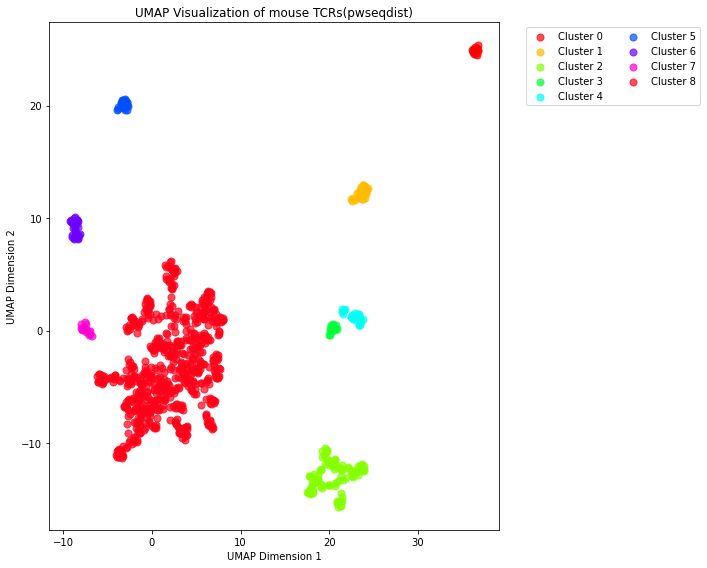

In [80]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8, n_components=2, random_state=42).fit_transform(trm_alpha_pwseqdist)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10,
).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization of mouse TCRs(pwseqdist)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [82]:
# epitope_names = mouse_alpha_clone["epitope"]
# unique_clusters = sorted(set(labels))
# for cluster_label in unique_clusters:
#     cluster_indices = labels == cluster_label
#     epitope_cluster = epitope_names[cluster_indices]
#     epitope_cluster_unique = epitope_cluster.unique()
#     print(f"Cluster {cluster_label}: {', '.join(epitope_cluster_unique)}")

In [81]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.4779251
Davies–Bouldin Index: 0.3499752588749476


Clustring TCRs alpha chains / using a reciprocal Needleman-Wunsch alignment score based dissimilarity "nw_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


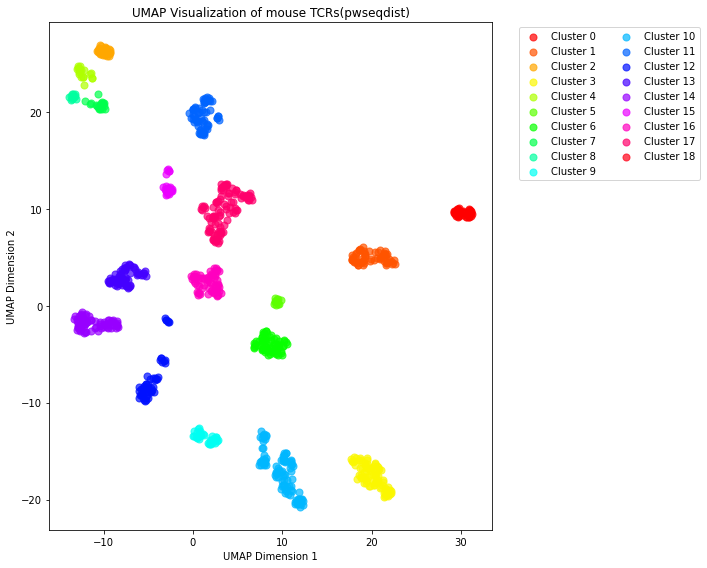

In [85]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8, n_components=2, random_state=42).fit_transform(trm_alpha_nw_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10,
).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization of mouse TCRs(pwseqdist)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [86]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.7095241
Davies–Bouldin Index: 0.3589314032322314


Clustring TCRs alpha chains / using a pairwise Needleman-Wunsch alignment followed by hamming distance "hamming_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


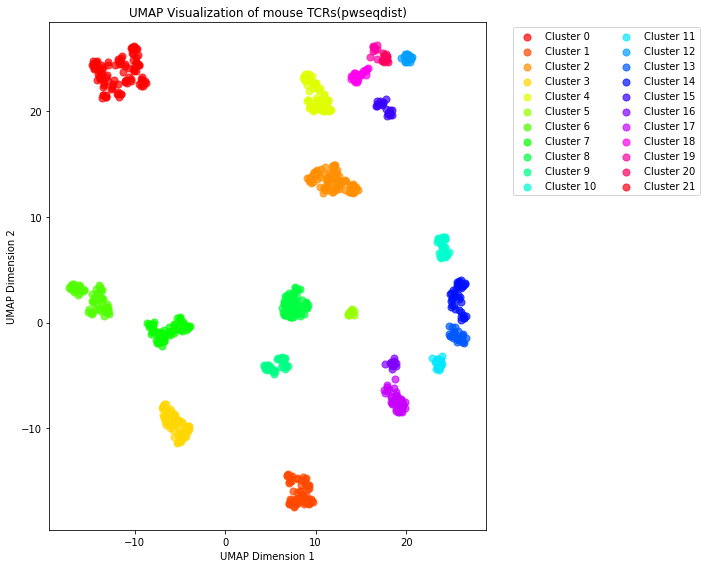

In [93]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8, n_components=2, random_state=42).fit_transform(trm_alpha_hamming_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization of mouse TCRs(pwseqdist)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [94]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.70746255
Davies–Bouldin Index: 0.9811852552292023


# Use UMAP for clustring and plotting / Mouse beta chains 

Clustring TCRs beta chains / using the defult distance matrix "pwseqdist"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


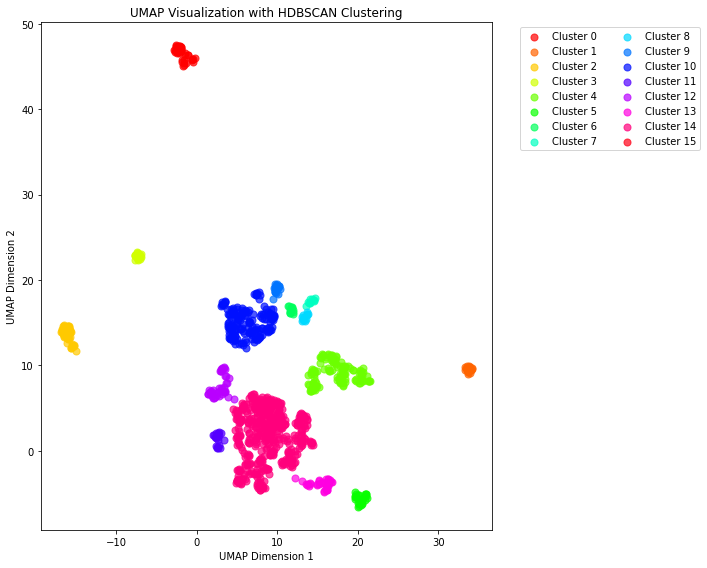

In [95]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trm_beta_pwseqdist)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [96]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.42905197
Davies–Bouldin Index: 0.5356355268242351


Clustring TCRs alpha chains / using a pairwise Needleman-Wunsch alignment followed by hamming distance "hamming_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


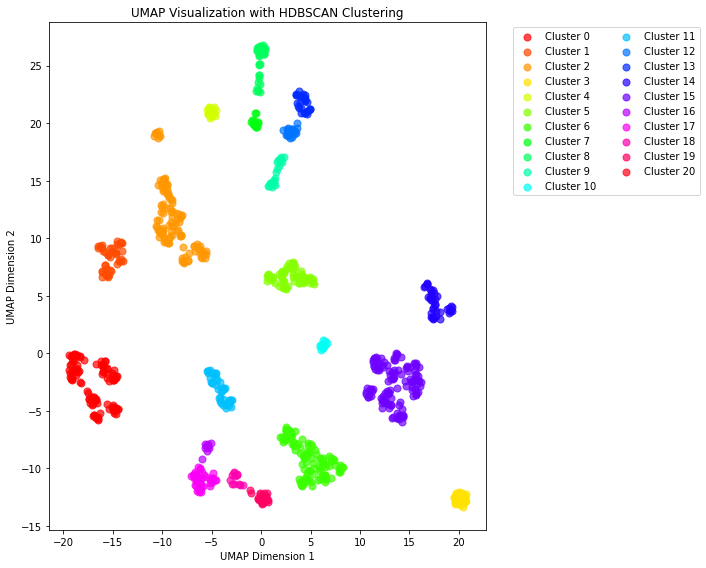

In [97]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trm_beta_hamming_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)
#plot
plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [98]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)


Silhouette Score: 0.6581539
Davies–Bouldin Index: 0.7578752896353204


Clustring TCRs alpha chains / using a reciprocal Needleman-Wunsch alignment score based dissimilarity "nw_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


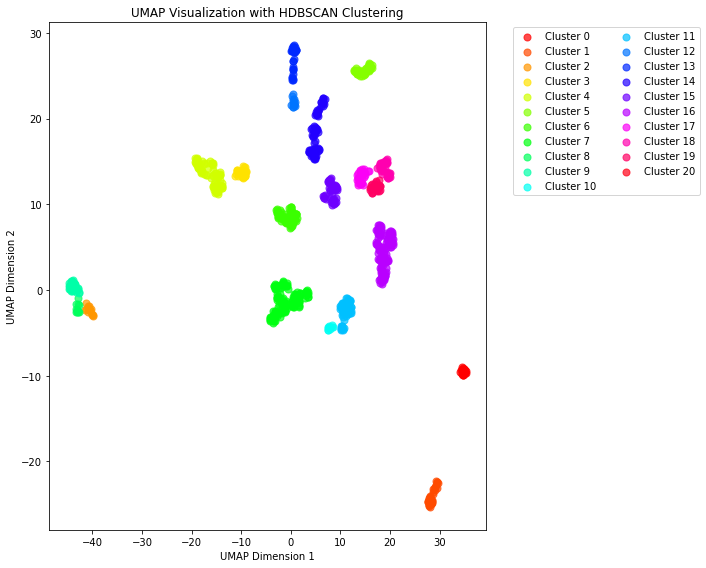

In [100]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trm_beta_nw_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)
#plot
plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [102]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)


Silhouette Score: 0.65363604
Davies–Bouldin Index: 0.5933807296660638


# Human Data Cleaning and Mesuring the distance.

In [108]:
dfh = dfh.dropna()

In [109]:
dfh.isnull().values.any()

False

In [110]:
dfh_alpha = dfh[dfh['Gene'] == 'TRA']
dfh_beta= dfh[dfh['Gene'] == 'TRB']

In [111]:
dfh_alpha.reset_index(drop=True, inplace=True)
dfh_beta.reset_index(drop=True, inplace=True)

In [112]:
len(dfh_beta)

6596

# Measure the distance for alpha and beta dataframes (Human):

In [114]:
dfh_alpha_distance = dfh_alpha.drop(columns=['Gene','Species','MHCclass','Score'])
dfh_beta_distance = dfh_beta.drop(columns=['Gene','Species','MHCclass','Score'])
dfh_alpha_distance = dfh_alpha_distance.dropna()
dfh_beta_distance = dfh_beta_distance.dropna()

In [115]:
dfh_alpha_distance.isnull().values.any()

False

In [116]:
dfh_beta_distance.isnull().values.any()

False

In [117]:
num_duplicated_rows = dfh_alpha_distance.duplicated().sum()
num_duplicated_rows

361

In [118]:
num_duplicated_rows = dfh_beta_distance.duplicated().sum()
num_duplicated_rows

1351

In [119]:
dfh_alpha_distance = dfh_alpha_distance.rename(columns={'CDR3': 'cdr3_a_aa', 'V': 'v_a_gene', 'J': 'j_a_gene','Epitope': 'epitope'})
dfh_beta_distance = dfh_beta_distance.rename(columns={'CDR3': 'cdr3_b_aa', 'V': 'v_b_gene', 'J': 'j_b_gene','Epitope': 'epitope'})

In [120]:
dfh_alpha_distance = dfh_alpha_distance.groupby(dfh_alpha_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})
len(dfh_alpha_distance)

2419

In [121]:
dfh_beta_distance = dfh_beta_distance.groupby(dfh_beta_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})
len(dfh_beta_distance)

5245

# Distance betwen alpha chains (human)

In [123]:
tr_human_alpha_pwseqdist = TCRrep(cell_df = dfh_alpha_distance, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

trh_alpha_pwseqdist= tr_human_alpha_pwseqdist.pw_alpha
trh_alpha_pwseqdist

array([[  0, 162, 163, ..., 182, 171, 157],
       [162,   0,  92, ..., 160, 156,  98],
       [163,  92,   0, ..., 160, 176,  63],
       ...,
       [182, 160, 160, ...,   0, 141, 133],
       [171, 156, 176, ..., 141,   0, 158],
       [157,  98,  63, ..., 133, 158,   0]], dtype=int16)

In [125]:
#pw.metrics.nw_hamming_metric, this distance include alpha chains that has no beta chains countrypart (complexID = 0)

tr_human_alpha_nw_hamming_metric = TCRrep(cell_df = dfh_alpha_distance, 
            organism = 'human', 
            chains = ['alpha'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_human_alpha_nw_hamming_metric.metrics_a = metrics_a
tr_human_alpha_nw_hamming_metric.metrics_b = metrics_b

tr_human_alpha_nw_hamming_metric.weights_a = weights_a
tr_human_alpha_nw_hamming_metric.weights_b = weights_b

tr_human_alpha_nw_hamming_metric.kargs_a = kargs_a 
tr_human_alpha_nw_hamming_metric.kargs_b = kargs_b

tr_human_alpha_nw_hamming_metric.compute_distances()

trh_alpha_hamming_metric = tr_human_alpha_nw_hamming_metric.pw_alpha
trh_alpha_hamming_metric

array([[ 0, 27, 25, ..., 32, 27, 26],
       [27,  0, 18, ..., 29, 20, 19],
       [25, 18,  0, ..., 28, 26,  7],
       ...,
       [32, 29, 28, ...,  0, 26, 25],
       [27, 20, 26, ..., 26,  0, 24],
       [26, 19,  7, ..., 25, 24,  0]])

In [126]:
#pw.metrics.nw_metric, this distance include alpha chains that has no beta chains countrypart (complexID = 0)

tr_human_alpha_nw_metric = TCRrep(cell_df = dfh_alpha_distance, 
            organism = 'human', 
            chains = ['alpha'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_metric ,
    "pmhc_a_aa" : pw.metrics.nw_metric ,
    "cdr2_a_aa" : pw.metrics.nw_metric ,
    "cdr1_a_aa" : pw.metrics.nw_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_metric ,
    "pmhc_b_aa" : pw.metrics.nw_metric ,
    "cdr2_b_aa" : pw.metrics.nw_metric ,
    "cdr1_b_aa" : pw.metrics.nw_metric }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_human_alpha_nw_metric.metrics_a = metrics_a
tr_human_alpha_nw_metric.metrics_b = metrics_b

tr_human_alpha_nw_metric.weights_a = weights_a
tr_human_alpha_nw_metric.weights_b = weights_b

tr_human_alpha_nw_metric.kargs_a = kargs_a 
tr_human_alpha_nw_metric.kargs_b = kargs_b

tr_human_alpha_nw_metric.compute_distances()

trh_alpha_nw_metric = tr_human_alpha_nw_metric.pw_alpha
trh_alpha_nw_metric

array([[  0, 309, 272, ..., 364, 297, 281],
       [309,   0, 189, ..., 327, 216, 214],
       [272, 189,   0, ..., 332, 277,  75],
       ...,
       [364, 327, 332, ...,   0, 319, 303],
       [297, 216, 277, ..., 319,   0, 262],
       [281, 214,  75, ..., 303, 262,   0]])

# Distance between beta chains (human)

In [127]:
tr_human_beta_pwseqdist = TCRrep(cell_df = dfh_beta_distance, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

trh_beta_pwseqdist = tr_human_beta_pwseqdist.pw_beta
trh_beta_pwseqdist

array([[  0, 170, 159, ..., 151, 141, 140],
       [170,   0, 127, ..., 148, 174, 160],
       [159, 127,   0, ..., 140, 157, 153],
       ...,
       [151, 148, 140, ...,   0, 121,  97],
       [141, 174, 157, ..., 121,   0, 122],
       [140, 160, 153, ...,  97, 122,   0]], dtype=int16)

In [128]:
#pw.metrics.nw_hamming_metric, this distance include beta chains that has no alpha chains countrypart (complexID = 0)

tr_human_beta_nw_hamming_metric = TCRrep(cell_df = dfh_beta_distance, 
            organism = 'human', 
            chains = ['beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_human_beta_nw_hamming_metric.metrics_a = metrics_a
tr_human_beta_nw_hamming_metric.metrics_b = metrics_b

tr_human_beta_nw_hamming_metric.weights_a = weights_a
tr_human_beta_nw_hamming_metric.weights_b = weights_b

tr_human_beta_nw_hamming_metric.kargs_a = kargs_a 
tr_human_beta_nw_hamming_metric.kargs_b = kargs_b

tr_human_beta_nw_hamming_metric.compute_distances()

trh_beta_hamming_metric = tr_human_beta_nw_hamming_metric.pw_beta
trh_beta_hamming_metric

array([[ 0, 24, 27, ..., 24, 20, 24],
       [24,  0, 25, ..., 21, 24, 19],
       [27, 25,  0, ..., 24, 29, 25],
       ...,
       [24, 21, 24, ...,  0, 16, 16],
       [20, 24, 29, ..., 16,  0, 22],
       [24, 19, 25, ..., 16, 22,  0]])

In [146]:
#pw.metrics.nw_metric, this distance include beta chains that has no alpha chains countrypart (complexID = 0)

tr_human_beta_nw_metric = TCRrep(cell_df = dfh_beta_distance, 
            organism = 'human', 
            chains = ['beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_metric ,
    "pmhc_a_aa" : pw.metrics.nw_metric ,
    "cdr2_a_aa" : pw.metrics.nw_metric ,
    "cdr1_a_aa" : pw.metrics.nw_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_metric ,
    "pmhc_b_aa" : pw.metrics.nw_metric ,
    "cdr2_b_aa" : pw.metrics.nw_metric ,
    "cdr1_b_aa" : pw.metrics.nw_metric }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_human_beta_nw_metric.metrics_a = metrics_a
tr_human_beta_nw_metric.metrics_b = metrics_b

tr_human_beta_nw_metric.weights_a = weights_a
tr_human_beta_nw_metric.weights_b = weights_b

tr_human_beta_nw_metric.kargs_a = kargs_a 
tr_human_beta_nw_metric.kargs_b = kargs_b

tr_human_beta_nw_metric.compute_distances()

trh_beta_nw_metric = tr_human_beta_nw_metric.pw_beta
trh_beta_nw_metric

array([[  0, 300, 315, ..., 275, 247, 274],
       [300,   0, 305, ..., 245, 285, 238],
       [315, 305,   0, ..., 298, 300, 309],
       ...,
       [275, 245, 298, ...,   0, 182, 169],
       [247, 285, 300, ..., 182,   0, 243],
       [274, 238, 309, ..., 169, 243,   0]])

# Distance between alpha and beta chains (human) "Moving complex.ID 0"

In [147]:
dfh_zero_alpha_complexID = dfh_alpha_distance[dfh_alpha_distance['ComplexID'] == 0]

In [148]:
len(dfh_zero_alpha_complexID)

478

In [149]:
dfh_zero_beta_complexID = dfh_beta_distance[dfh_beta_distance['ComplexID'] == 0]

In [150]:
len(dfh_zero_beta_complexID)

3279

In [151]:
dfh_nonzero_alpha = dfh_alpha_distance[dfh_alpha_distance['ComplexID'] != 0]

In [152]:
dfh_nonzero_beta = dfh_beta_distance[dfh_beta_distance['ComplexID'] != 0]

In [153]:
len(dfh_nonzero_alpha)

1941

In [154]:
len(dfh_nonzero_beta)

1966

In [155]:
merged_dfh_nonzero = pd.merge(dfh_nonzero_alpha, dfh_nonzero_beta, on='ComplexID', how='inner')

In [156]:
len(merged_dfh_nonzero)

1868

In [157]:
#merged_dfh_nonzero

In [158]:
merged_dfh_nonzero = merged_dfh_nonzero[['ComplexID','cdr3_a_aa','v_a_gene','j_a_gene','cdr3_b_aa','v_b_gene','j_b_gene','epitope_x','EpitopeSpecies_x']]
merged_dfh_nonzero = merged_dfh_nonzero.groupby(merged_dfh_nonzero.columns.tolist()).size().reset_index().rename(columns={0:'count'})
merged_dfh_nonzero = merged_dfh_nonzero.rename(columns={'epitope_x':'epitope','EpitopeSpecies_x':'EpitopeSpecies'})

In [159]:
tr_human_alpha_beta_pwseqdist = TCRrep(cell_df = merged_dfh_nonzero, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

trh_beta_pwseqdist = tr_human_alpha_beta_pwseqdist.pw_beta
trh_alpah_pwseqdist = tr_human_alpha_beta_pwseqdist.pw_alpha
trh_alpha_beta_pwseqdist = trh_beta_pwseqdist + trh_alpah_pwseqdist
trh_alpha_beta_pwseqdist

array([[  0, 177, 289, ..., 352, 391, 326],
       [177,   0, 310, ..., 322, 331, 297],
       [289, 310,   0, ..., 266, 297, 254],
       ...,
       [352, 322, 266, ...,   0, 262, 230],
       [391, 331, 297, ..., 262,   0, 280],
       [326, 297, 254, ..., 230, 280,   0]], dtype=int16)

In [160]:
#pw.metrics.nw_hamming_metric, this distance include alpha and beta chains
tr_human_alpha_beta_nw_hamming_metric = TCRrep(cell_df = merged_dfh_nonzero, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_human_alpha_beta_nw_hamming_metric.metrics_a = metrics_a
tr_human_alpha_beta_nw_hamming_metric.metrics_b = metrics_b

tr_human_alpha_beta_nw_hamming_metric.weights_a = weights_a
tr_human_alpha_beta_nw_hamming_metric.weights_b = weights_b

tr_human_alpha_beta_nw_hamming_metric.kargs_a = kargs_a 
tr_human_alpha_beta_nw_hamming_metric.kargs_b = kargs_b

tr_human_alpha_beta_nw_hamming_metric.compute_distances()

trh_alpha_hamming_metric = tr_human_alpha_beta_nw_hamming_metric.pw_alpha
trh_beta_hamming_metric = tr_human_alpha_beta_nw_hamming_metric.pw_beta

trh_alpha_beta_hamming_metric = trh_alpha_hamming_metric + trh_beta_hamming_metric
trh_alpha_beta_hamming_metric

array([[ 0, 31, 49, ..., 45, 57, 52],
       [31,  0, 53, ..., 54, 49, 46],
       [49, 53,  0, ..., 47, 47, 46],
       ...,
       [45, 54, 47, ...,  0, 42, 41],
       [57, 49, 47, ..., 42,  0, 46],
       [52, 46, 46, ..., 41, 46,  0]])

In [161]:
#pw.metrics.nw_metric, this distance include alpha and beta chains.

tr_human_alpha_beta_nw_metric = TCRrep(cell_df = merged_dfh_nonzero, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_metric ,
    "pmhc_a_aa" : pw.metrics.nw_metric ,
    "cdr2_a_aa" : pw.metrics.nw_metric ,
    "cdr1_a_aa" : pw.metrics.nw_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_metric ,
    "pmhc_b_aa" : pw.metrics.nw_metric ,
    "cdr2_b_aa" : pw.metrics.nw_metric ,
    "cdr1_b_aa" : pw.metrics.nw_metric }

weights_a = { 
    "cdr3_a_aa" : 1,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 1,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }

tr_human_alpha_beta_nw_metric.metrics_a = metrics_a
tr_human_alpha_beta_nw_metric.metrics_b = metrics_b

tr_human_alpha_beta_nw_metric.weights_a = weights_a
tr_human_alpha_beta_nw_metric.weights_b = weights_b

tr_human_alpha_beta_nw_metric.kargs_a = kargs_a 
tr_human_alpha_beta_nw_metric.kargs_b = kargs_b

tr_human_alpha_beta_nw_metric.compute_distances()

trh_alpha_nw_metric = tr_human_alpha_beta_nw_metric.pw_alpha
trh_beta_nw_metric = tr_human_alpha_beta_nw_metric.pw_beta

trh_alpha_beta_nw_metric = trh_alpha_nw_metric +trh_beta_nw_metric

trh_alpha_beta_nw_metric

array([[  0, 356, 597, ..., 518, 653, 566],
       [356,   0, 609, ..., 616, 605, 490],
       [597, 609,   0, ..., 543, 542, 509],
       ...,
       [518, 616, 543, ...,   0, 501, 472],
       [653, 605, 542, ..., 501,   0, 505],
       [566, 490, 509, ..., 472, 505,   0]])

# Clustering:

In [133]:
tr_human_alpha.clone_df['NLVPMVATV'] = ['NLVPMVATV' if x == 'NLVPMVATV' else 'X' for x in tr_human_alpha.clone_df.epitope]

res, Z= hcluster_diff(tr_human_alpha.clone_df, tr_human_alpha.pw_alpha, x_cols = ['NLVPMVATV'], count_col = 'count')

res_summary = member_summ(res_df = res, clone_df = tr_human_alpha.clone_df, addl_cols=['epitope'])

res_detailed = pd.concat([res, res_summary], axis = 1)

html = plot_hclust_props(Z,
            title='Clustering TCRs human alpha chains',
            res=res_detailed,
            tooltip_cols=['cdr3_a_aa','v_a_gene', 'j_a_gene','epitope'],
            alpha=0.00001, colors = ['blue','green'],
            alpha_col='pvalue')

with open('human_alpha_clustering.html', 'w') as fh:
    fh.write(html)

In [ ]:
tr_human_beta.clone_df['NLVPMVATV'] = ['NLVPMVATV' if x == 'NLVPMVATV' else 'X' for x in tr_human_beta.clone_df.epitope]

res, Z= hcluster_diff(tr_human_beta.clone_df, trh, x_cols = ['NLVPMVATV'], count_col = 'count')

res_summary = member_summ(res_df = res, clone_df = tr_human_alpha_beta.clone_df, addl_cols=['epitope'])

res_detailed = pd.concat([res, res_summary], axis = 1)

html = plot_hclust_props(Z,
            title='Clustering TCRs human beta chains',
            res=res_detailed,
            tooltip_cols=['cdr3_a_aa','v_a_gene', 'j_a_gene','epitope'],
            alpha=0.00001, colors = ['blue','green'],
            alpha_col='pvalue')

with open('human_beta_clustering.html', 'w') as fh:
    fh.write(html)

In [ ]:
tr_human_alpha_beta.clone_df['NLVPMVATV'] = ['NLVPMVATV' if x == 'NLVPMVATV' else 'X' for x in tr_human_alpha_beta.clone_df.epitope]

res, Z= hcluster_diff(tr_human_alpha_beta.clone_df, tr_human_beta.pw_beta, x_cols = ['NLVPMVATV'], count_col = 'count')

res_summary = member_summ(res_df = res, clone_df = tr_human_beta.clone_df, addl_cols=['epitope'])

res_detailed = pd.concat([res, res_summary], axis = 1)

html = plot_hclust_props(Z,
            title='Clustering TCRs human alpha chains',
            res=res_detailed,
            tooltip_cols=['cdr3_a_aa','v_a_gene', 'j_a_gene','epitope'],
            alpha=0.00001, colors = ['blue','green'],
            alpha_col='pvalue')

with open('human_alpha_beta_clustering.html', 'w') as fh:
    fh.write(html)

# Clustering using UMAP/ Human alpha chains

Clustring TCRs alpha chains / using the defult distance matrix "pwseqdist"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


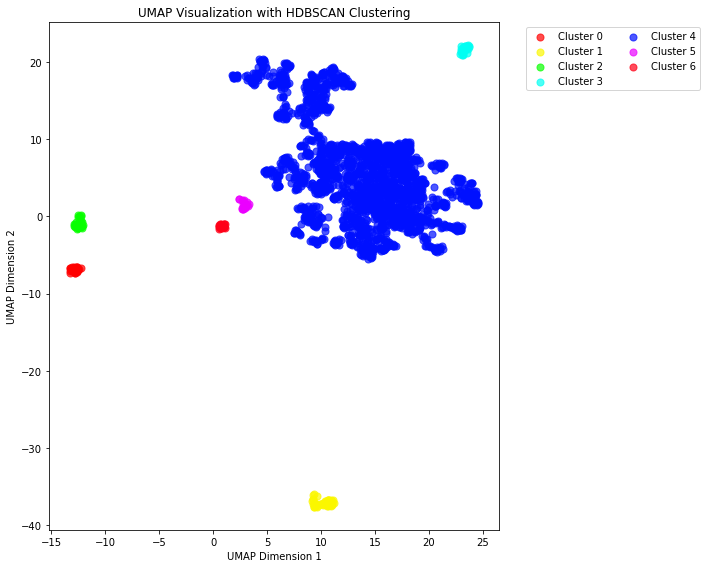

In [162]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_alpha_pwseqdist)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [163]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)


Silhouette Score: 0.28805575
Davies–Bouldin Index: 0.4054045110427196


Clustring TCRs alpha chains / using a pairwise Needleman-Wunsch alignment followed by hamming distance "hamming_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


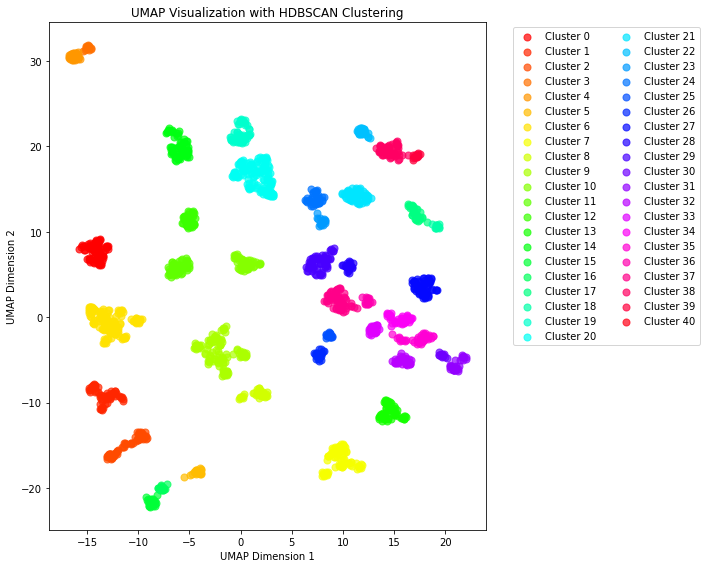

In [164]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_alpha_hamming_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [165]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.66803676
Davies–Bouldin Index: 2.1172751290374094


Clustring TCRs alpha chains / using a reciprocal Needleman-Wunsch alignment score based dissimilarity "nw_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


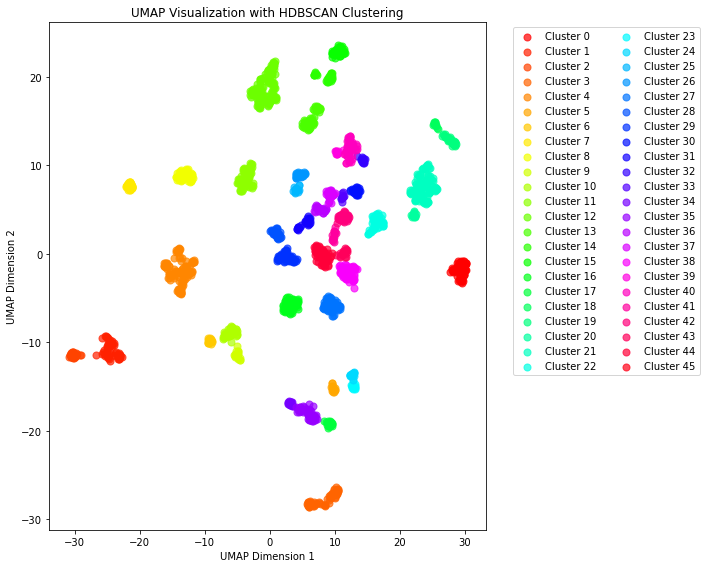

In [166]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_alpha_nw_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [167]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.6495985
Davies–Bouldin Index: 2.2445354756281106


# Clustering using UMAP/ Human beta chains

Clustring TCRs beta chains / using the defult distance matrix "pwseqdist"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


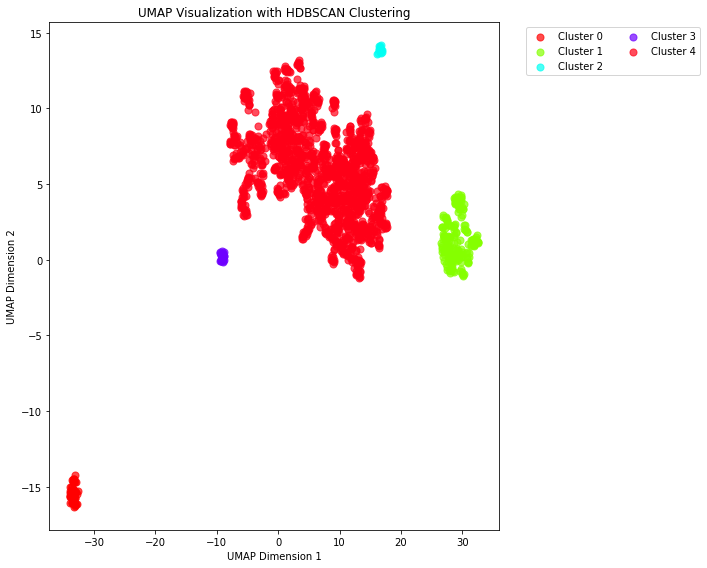

In [168]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_beta_pwseqdist)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [169]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.30545226
Davies–Bouldin Index: 0.39198046009043475


Clustring TCRs beta chains / using a pairwise Needleman-Wunsch alignment followed by hamming distance "hamming_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


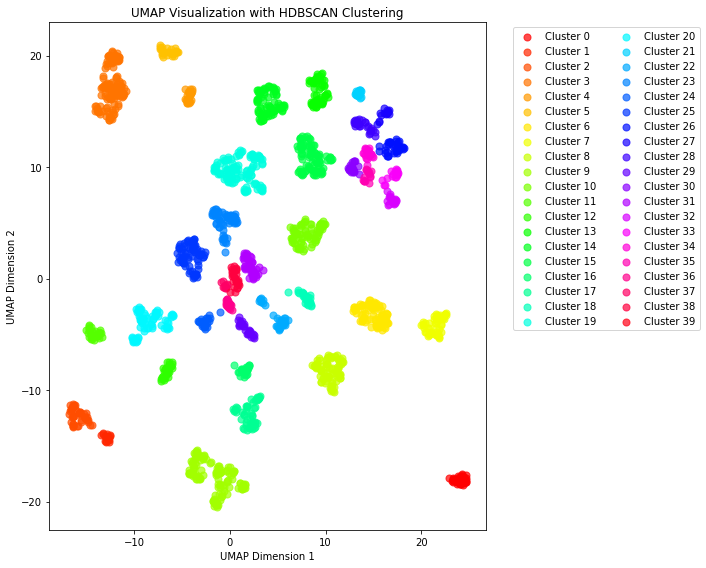

In [170]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_beta_hamming_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [171]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.6149251
Davies–Bouldin Index: 0.9849780218891911


Clustring TCRs beta chains / using a reciprocal Needleman-Wunsch alignment score based dissimilarity "nw_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


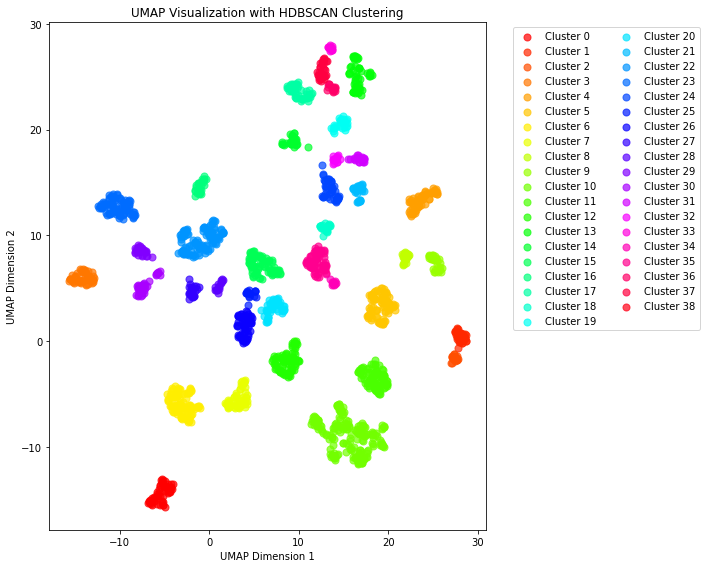

In [172]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_beta_nw_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [173]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.6340042
Davies–Bouldin Index: 0.8934117676153628


# Clustering using UMAP/ Human alpha and beta chains

Clustring TCRs alpha and beta chains / using the defult distance matrix "pwseqdist"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


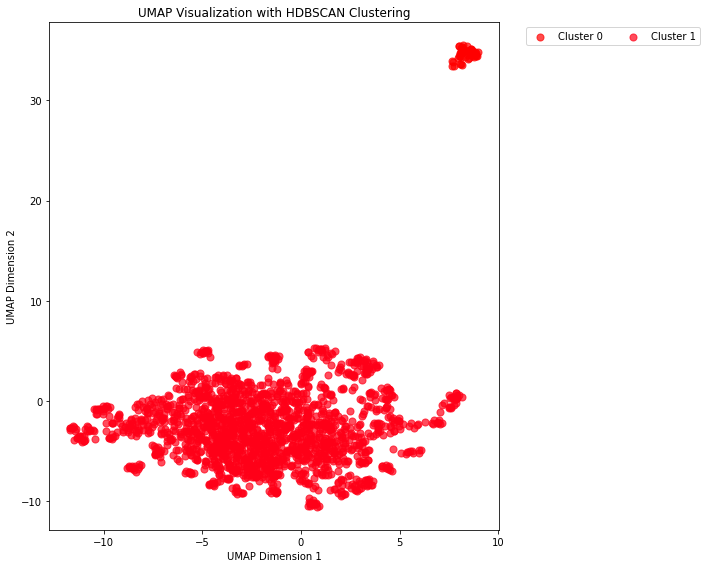

In [175]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_alpha_beta_pwseqdist)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [176]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)


Silhouette Score: 0.838118
Davies–Bouldin Index: 0.1320949599010704


Clustring TCRs alpha and beta chains / using a pairwise Needleman-Wunsch alignment followed by hamming distance "hamming_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


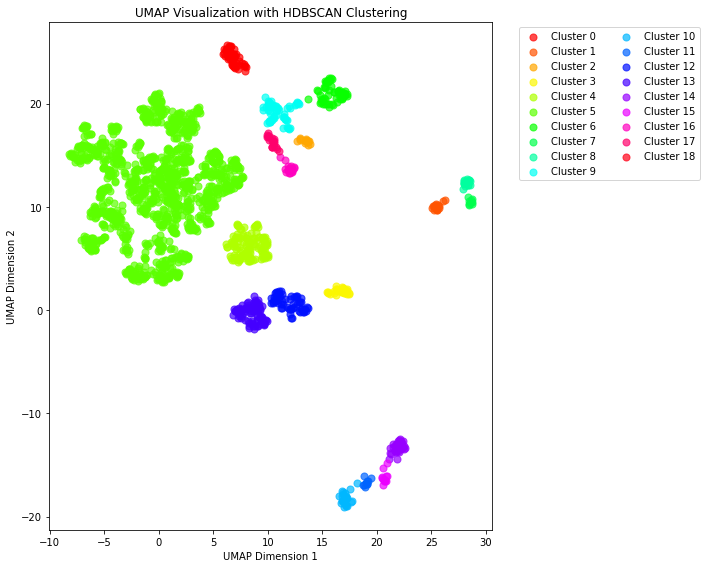

In [177]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_alpha_beta_hamming_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [178]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)


Silhouette Score: 0.3521614
Davies–Bouldin Index: 1.602516222217949


Clustring TCRs alpha and beta chains / using a reciprocal Needleman-Wunsch alignment score based dissimilarity "nw_metric"

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


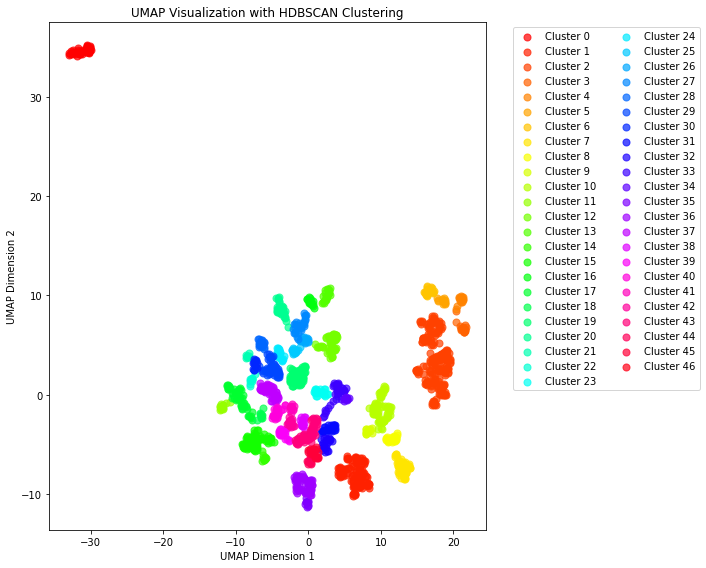

In [180]:
embedding = umap.UMAP(n_neighbors=20, min_dist=0.8,n_components=2, random_state=42).fit_transform(trh_alpha_beta_nw_metric)

labels = hdbscan.HDBSCAN(
    min_samples=7,
    min_cluster_size=10).fit_predict(embedding)

num_labels = len(np.unique(labels))

color_map = plt.cm.get_cmap('hsv', num_labels)

plt.figure(figsize=(10, 8))
for label in range(num_labels):
    clustered = (labels == label)
    plt.scatter(embedding[clustered, 0],
                embedding[clustered, 1],
                color=color_map(label),
                label=f'Cluster {label}',
                s=50,
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

plt.title('UMAP Visualization with HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()

plt.show()

In [187]:
len(merged_dfh_nonzero)

1868

In [186]:
len(trh_alpha_beta_nw_metric)

1868

In [181]:
silhouette = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(embedding, labels)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.29575232
Davies–Bouldin Index: 1.1889056396779443


# Classification usin SVM multi calss classification.

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\1282838936.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

   Accuracy    Recall Precision
0  0.767956  0.362798  0.325098
1  0.701657  0.280528  0.266831
2  0.727778  0.347636   0.34061
3  0.705556   0.36937  0.330496
4  0.738889  0.402562  0.401221


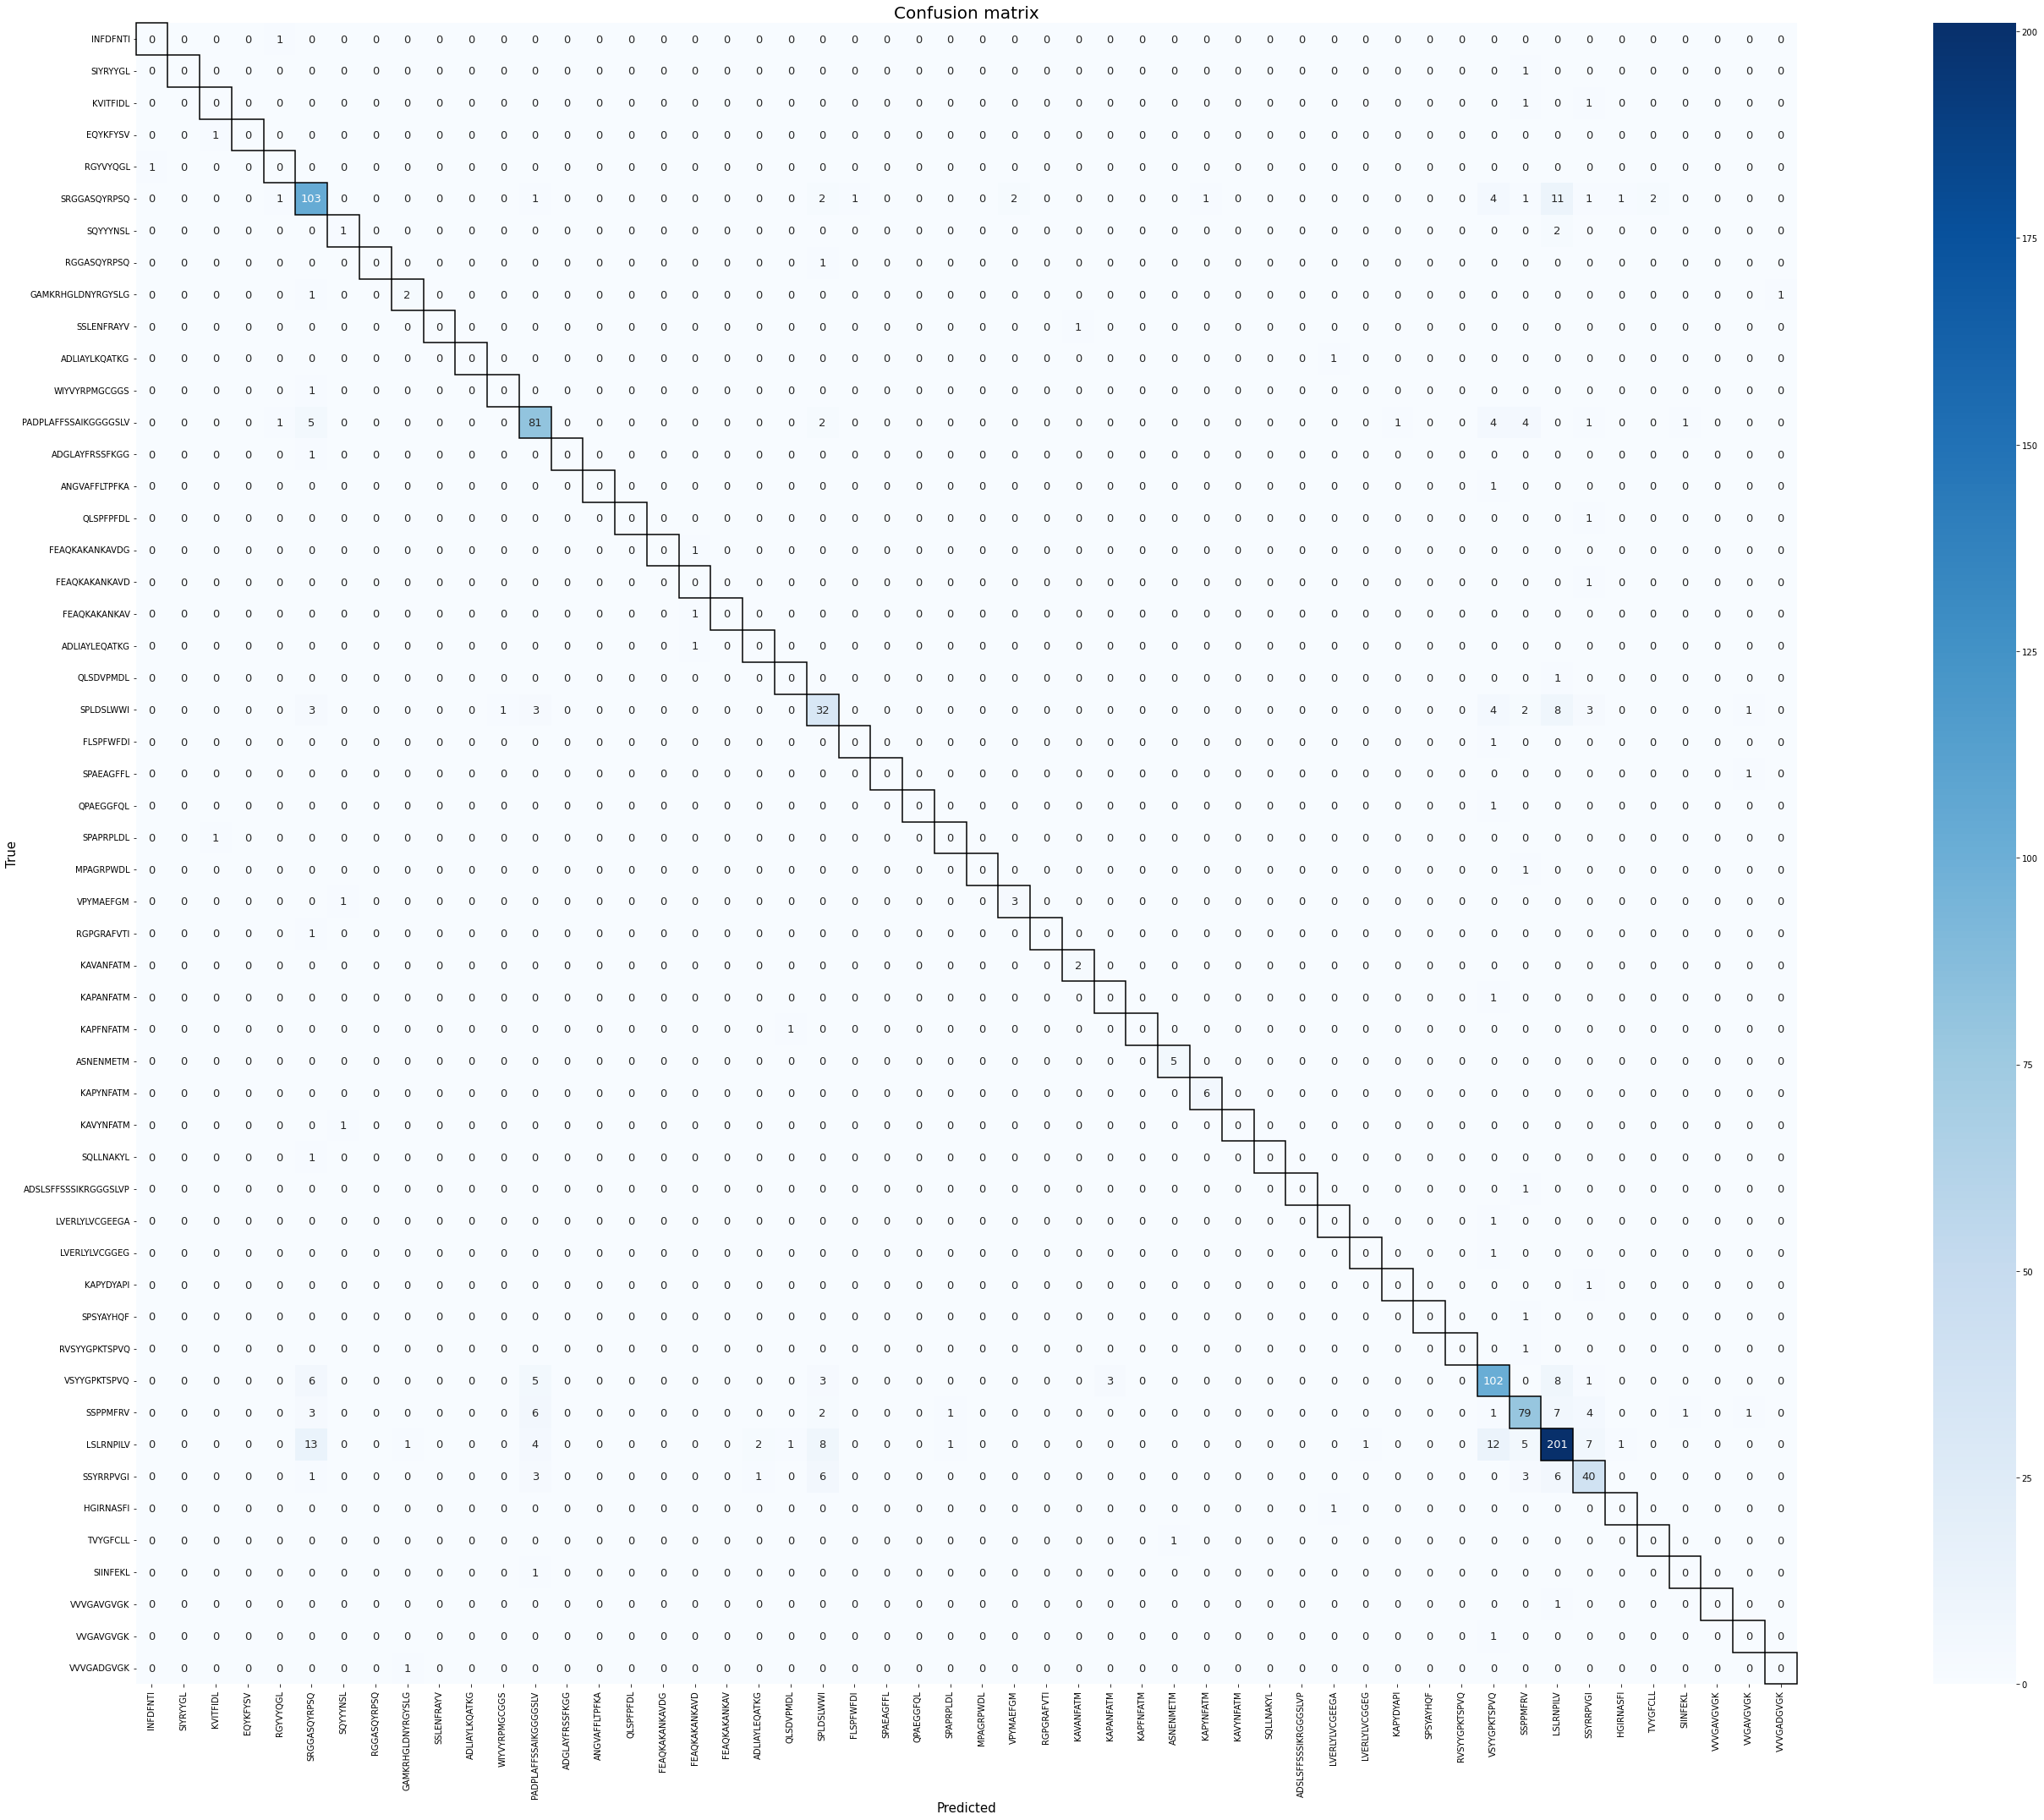

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\1282838936.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

   Accuracy    Recall Precision
0  0.762431  0.306908  0.280718
1  0.712707  0.278151  0.280974
2  0.744444  0.314065  0.316164
3  0.694444  0.315273  0.289161
4  0.716667  0.391594  0.382092


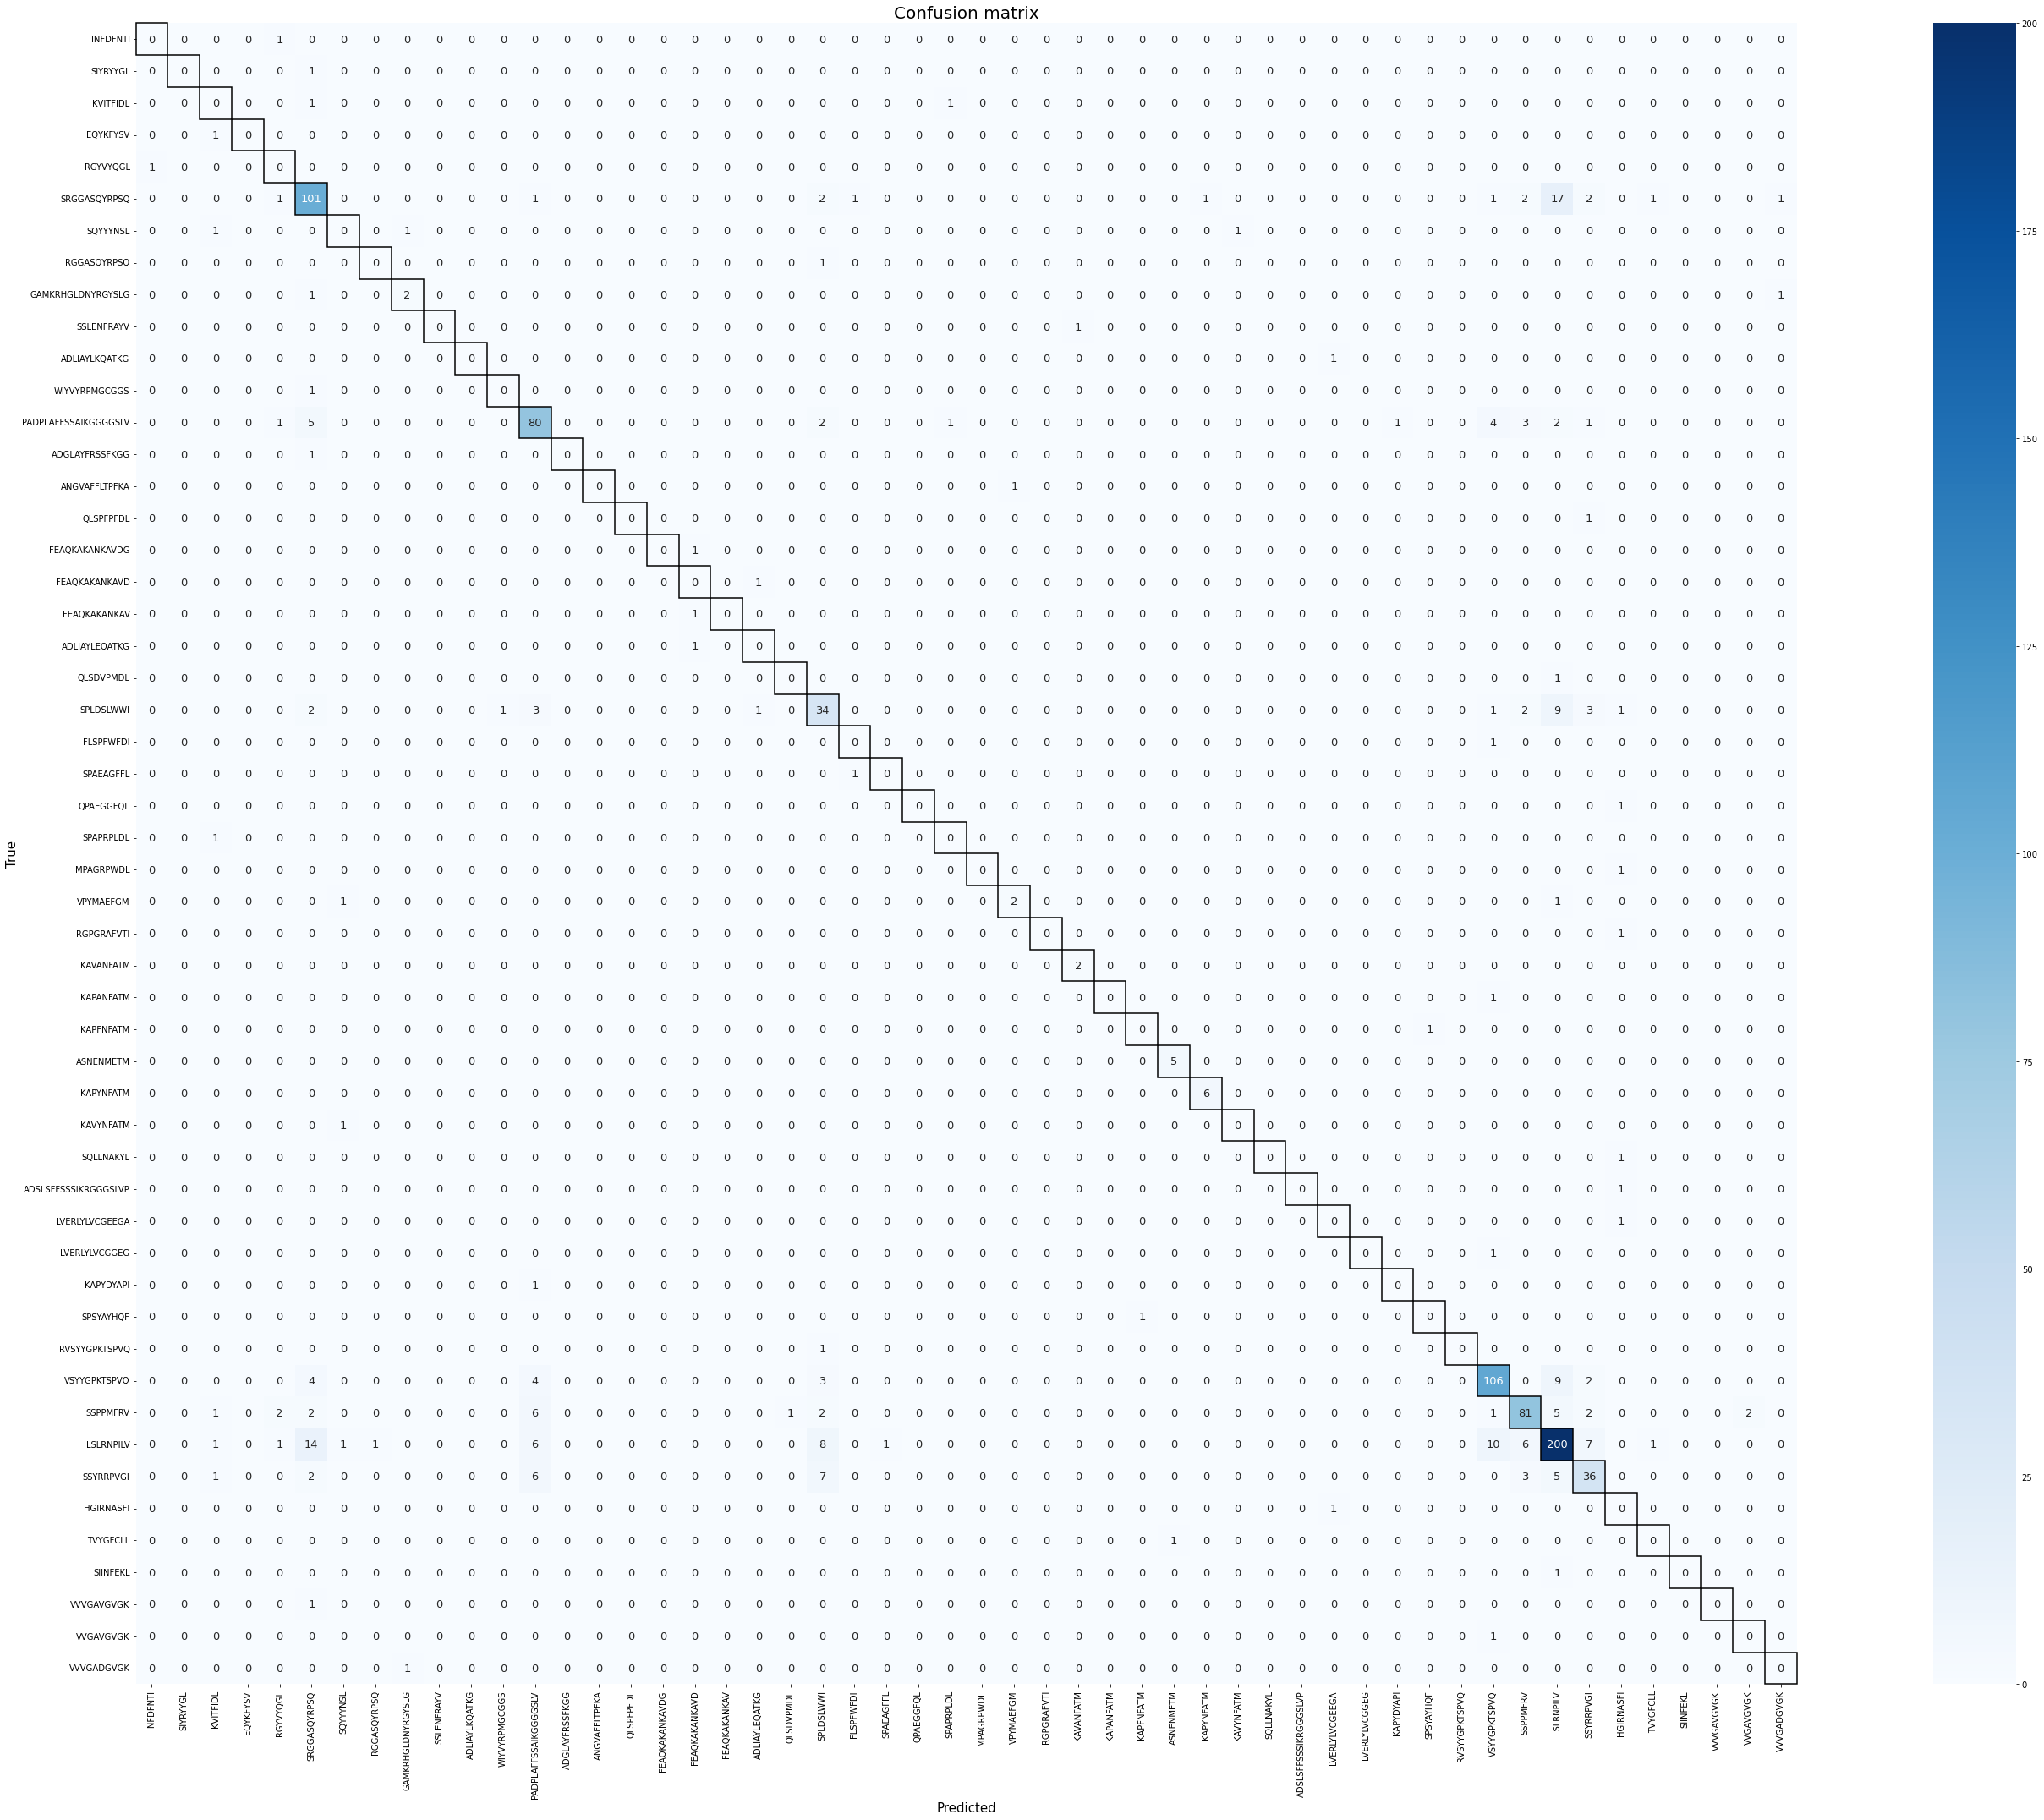

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\1282838936.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

   Accuracy    Recall Precision
0  0.767956  0.362798  0.325098
1  0.701657  0.280528  0.266831
2  0.727778  0.347636   0.34061
3  0.705556   0.36937  0.330496
4  0.738889  0.402562  0.401221


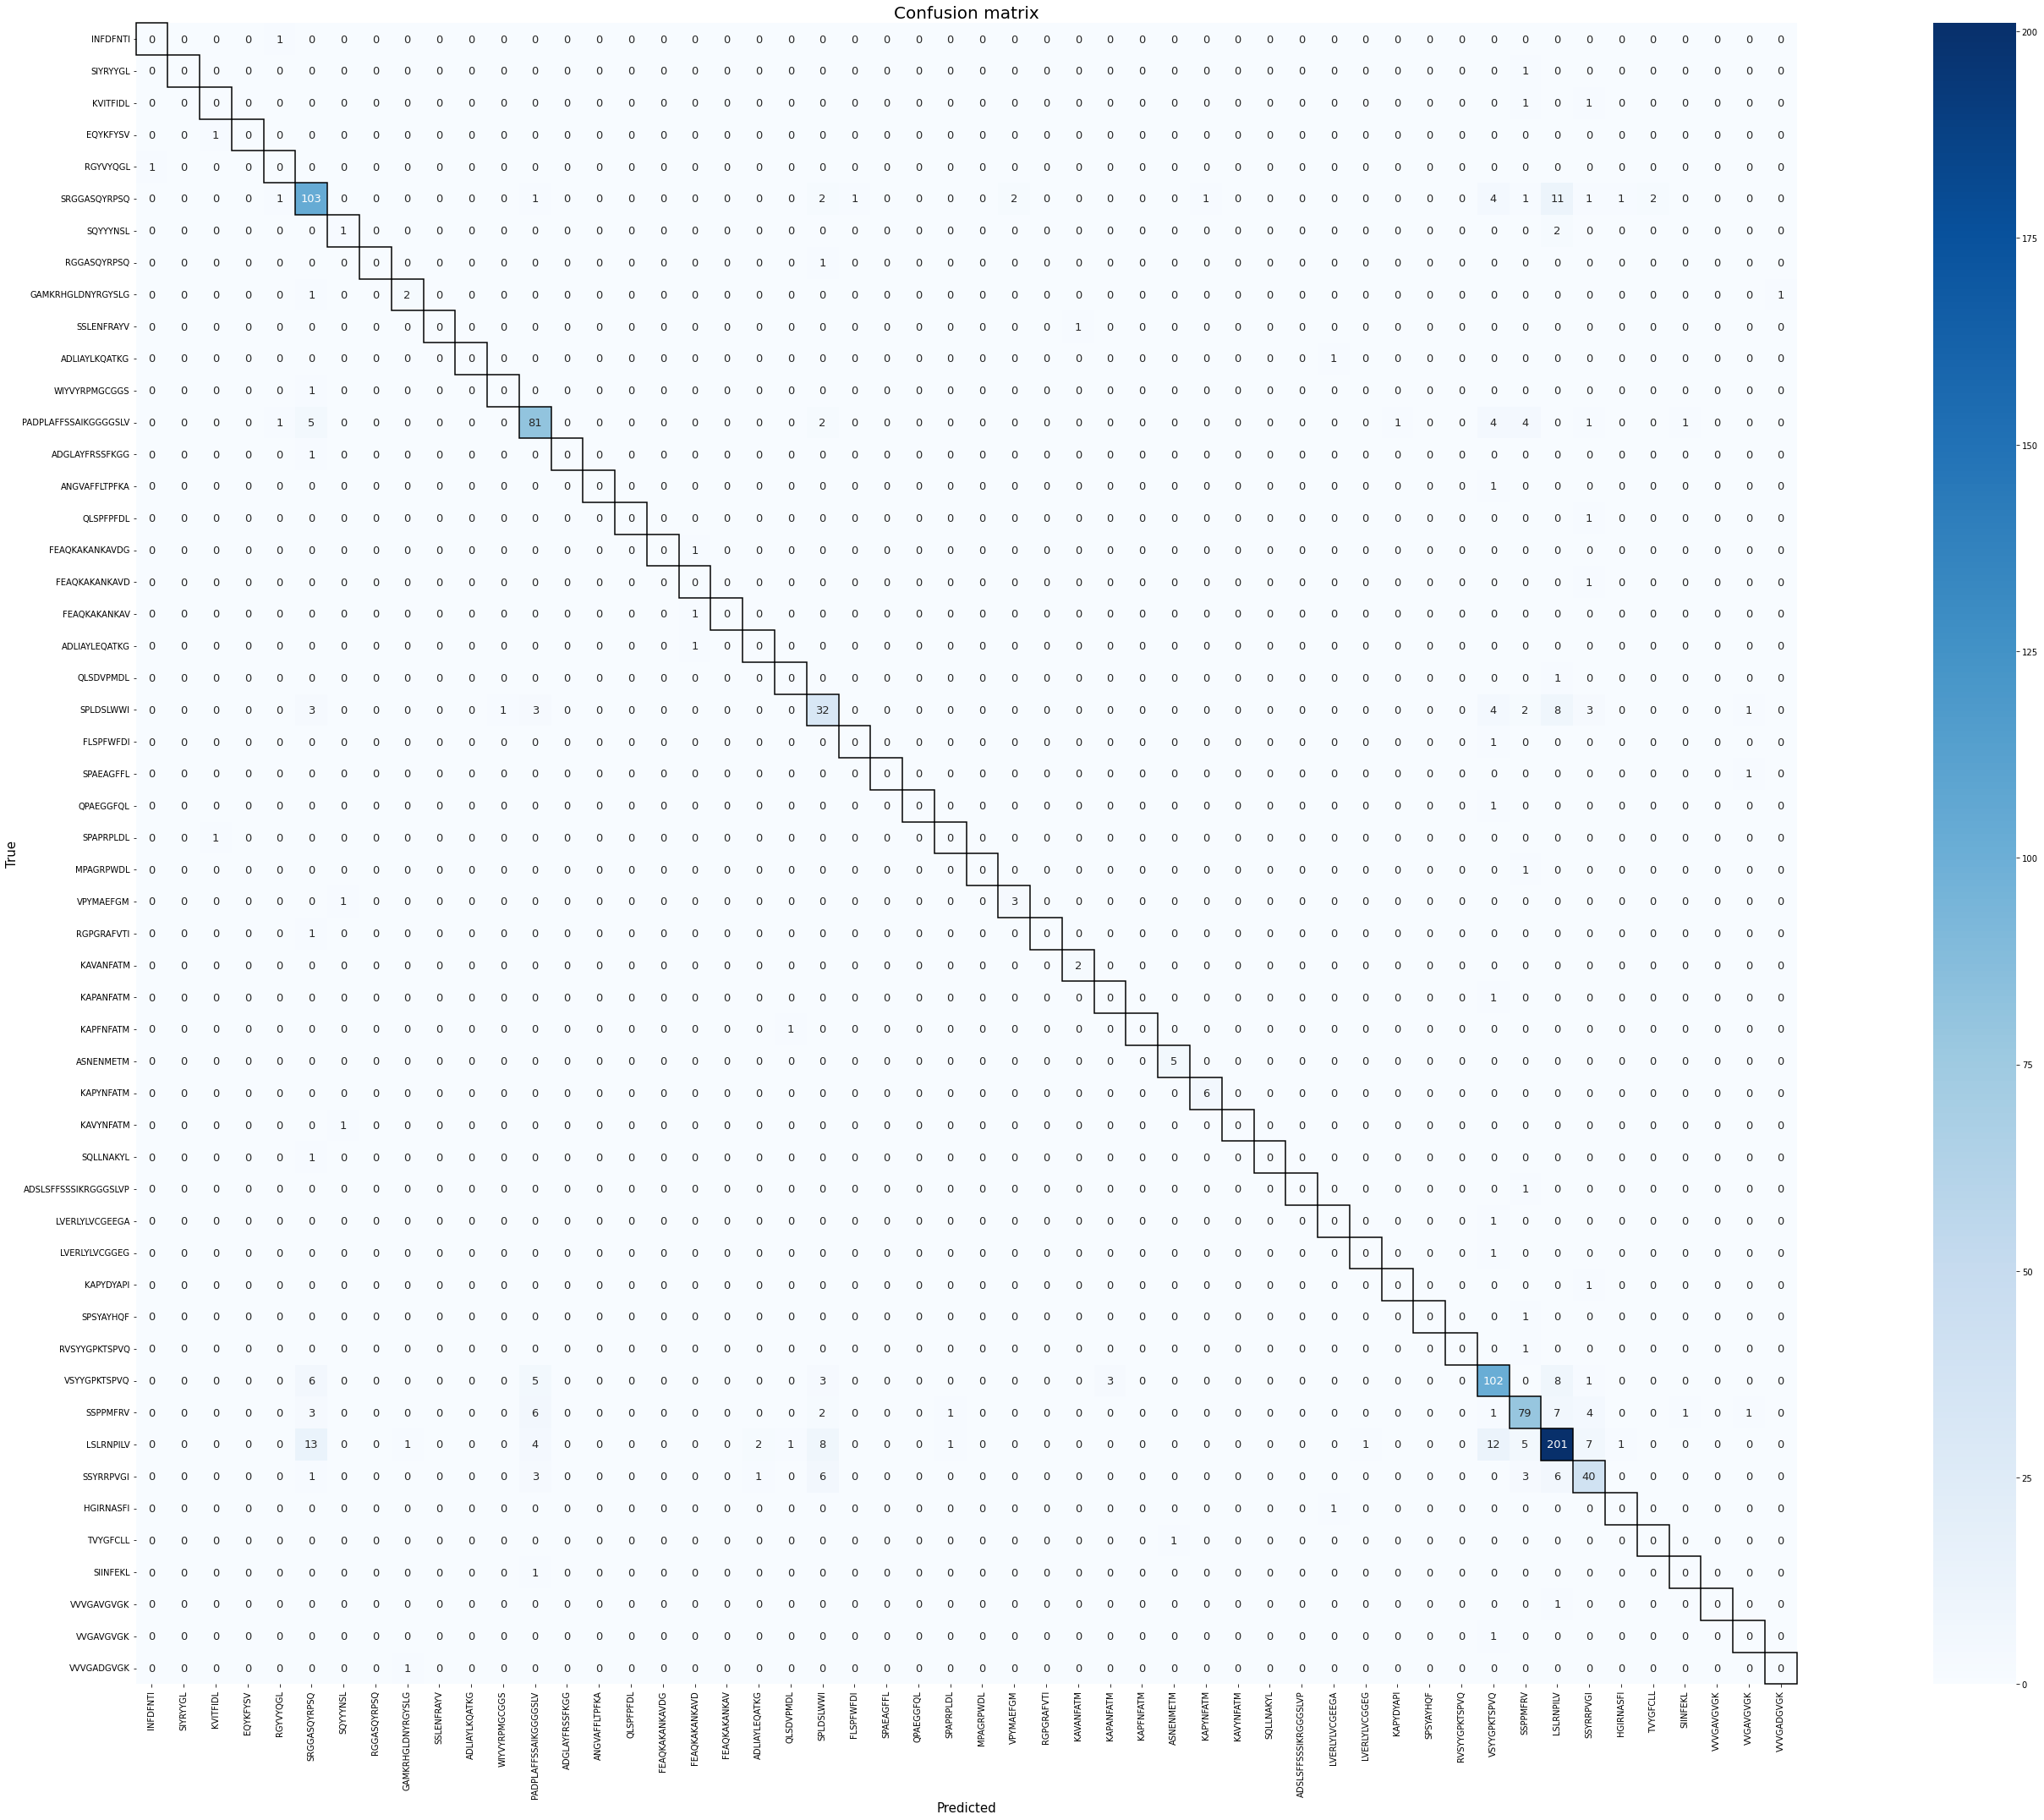

In [280]:
distance_values = [trm_alpha_beta_pwseqdist, trm_alpha_beta_hamming_metric, trm_alpha_beta_nw_metric]

for distance in distance_values:
    X = pd.DataFrame(distance)
    Y = tr_mouse_alpha_beta_pwseqdist.clone_df['epitope'].copy()
    metrics_cv_df = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision'])
    auc_cv_df = pd.DataFrame(columns=Y.unique())
    recall_cv_df = pd.DataFrame(columns=Y.unique())
    precision_cv_df = pd.DataFrame(columns=Y.unique())

    preds_df = pd.DataFrame(columns=['y_true', 'y_pred'], index=Y.index)

    kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    kfolds.get_n_splits(X)

    for train_ind, test_ind in kfolds.split(X, Y):
        X_train, X_test = X.iloc[train_ind, train_ind], X.iloc[test_ind, train_ind]
        Y_train, Y_test = Y.iloc[train_ind], Y.iloc[test_ind]
        model = OneVsRestClassifier(SVC(kernel='linear',probability=True))
        model.fit(X_train, Y_train) 

        preds_labels = model.predict(X_test)
        preds_prob = model.predict_proba(X_test)
        preds_df.loc[Y_test.index, 'y_true'] = Y_test.loc[Y_test.index].values
        preds_df.loc[Y_test.index, 'y_pred'] = preds_labels

        accuracy_fold = accuracy_score(Y_test, preds_labels)
        precision_fold = precision_score(Y_test, preds_labels, average='macro')
        recall_fold = recall_score(Y_test, preds_labels, average='macro')

        metrics_cv_df = metrics_cv_df.append(pd.Series({'Accuracy': accuracy_fold, 
                                                        'Recall': recall_fold, 'Precision': precision_fold}), ignore_index=True)
        recall_epitopes = recall_score(Y_test, preds_labels, average=None)

        precision_epitopes = precision_score(Y_test, preds_labels, average=None)

    print(metrics_cv_df)
    
    epitopes = list(preds_df['y_true'].unique())
    
    conf_mat_dash = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred']), columns=epitopes, index=epitopes)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(45,30))
    sns.set_context(font_scale=1.3)
    sns.heatmap(conf_mat_dash, annot=True, cmap='Blues', fmt='', ax=axes, square=True, annot_kws={"size": 13}, vmin=0)
    axes.set_xlabel('Predicted', fontsize=15)
    axes.set_ylabel('True', fontsize=15)
    axes.set_title('Confusion matrix', fontsize=20)

    for epi_ind in range(conf_mat_dash.shape[0]):
        axes.add_patch(Rectangle((epi_ind, epi_ind), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))

    plt.tight_layout()
    plt.show() 


Classify human TCRs

In [279]:
distance_values = [trh_alpha_beta_pwseqdist, trh_alpha_beta_hamming_metric, trh_alpha_beta_nw_metric]

for distance in distance_values:
    X = pd.DataFrame(distance)
    Y = tr_human_alpha_beta_pwseqdist.clone_df['epitope'].copy()
    metrics_cv_df = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision'])
    auc_cv_df = pd.DataFrame(columns=Y.unique())
    recall_cv_df = pd.DataFrame(columns=Y.unique())
    precision_cv_df = pd.DataFrame(columns=Y.unique())

    preds_df = pd.DataFrame(columns=['y_true', 'y_pred'], index=Y.index)

    kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    kfolds.get_n_splits(X)

    for train_ind, test_ind in kfolds.split(X, Y):
        X_train, X_test = X.iloc[train_ind, train_ind], X.iloc[test_ind, train_ind]
        Y_train, Y_test = Y.iloc[train_ind], Y.iloc[test_ind]
        model = OneVsRestClassifier(SVC(kernel='linear',probability=True))
        model.fit(X_train, Y_train) 

        preds_labels = model.predict(X_test)
        preds_prob = model.predict_proba(X_test)
        preds_df.loc[Y_test.index, 'y_true'] = Y_test.loc[Y_test.index].values
        preds_df.loc[Y_test.index, 'y_pred'] = preds_labels

        accuracy_fold = accuracy_score(Y_test, preds_labels)
        precision_fold = precision_score(Y_test, preds_labels, average='macro')
        recall_fold = recall_score(Y_test, preds_labels, average='macro')

        metrics_cv_df = metrics_cv_df.append(pd.Series({'Accuracy': accuracy_fold, 
                                                        'Recall': recall_fold, 'Precision': precision_fold}), ignore_index=True)
        recall_epitopes = recall_score(Y_test, preds_labels, average=None)

        precision_epitopes = precision_score(Y_test, preds_labels, average=None)

    print(metrics_cv_df)
    
    epitopes = list(preds_df['y_true'].unique())
    
    conf_mat_dash = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred']), columns=epitopes, index=epitopes)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(45,30))
    sns.set_context(font_scale=1.3)
    sns.heatmap(conf_mat_dash, annot=True, cmap='Blues', fmt='', ax=axes, square=True, annot_kws={"size": 13}, vmin=0)
    axes.set_xlabel('Predicted', fontsize=15)
    axes.set_ylabel('True', fontsize=15)
    axes.set_title('Confusion matrix', fontsize=20)

    for epi_ind in range(conf_mat_dash.shape[0]):
        axes.add_patch(Rectangle((epi_ind, epi_ind), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))

    plt.tight_layout()
    plt.show() 


ValueError: Found input variables with inconsistent numbers of samples: [1868, 902]

# Classification Using KNN

Mouse TCRs Classification 

In [278]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\3484728906.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

   Accuracy    Recall Precision
0  0.701657  0.304435  0.323329
1  0.723757  0.312538  0.340287
2       0.7  0.325777  0.352804
3  0.672222  0.330084  0.334219
4  0.688889  0.365722  0.400241


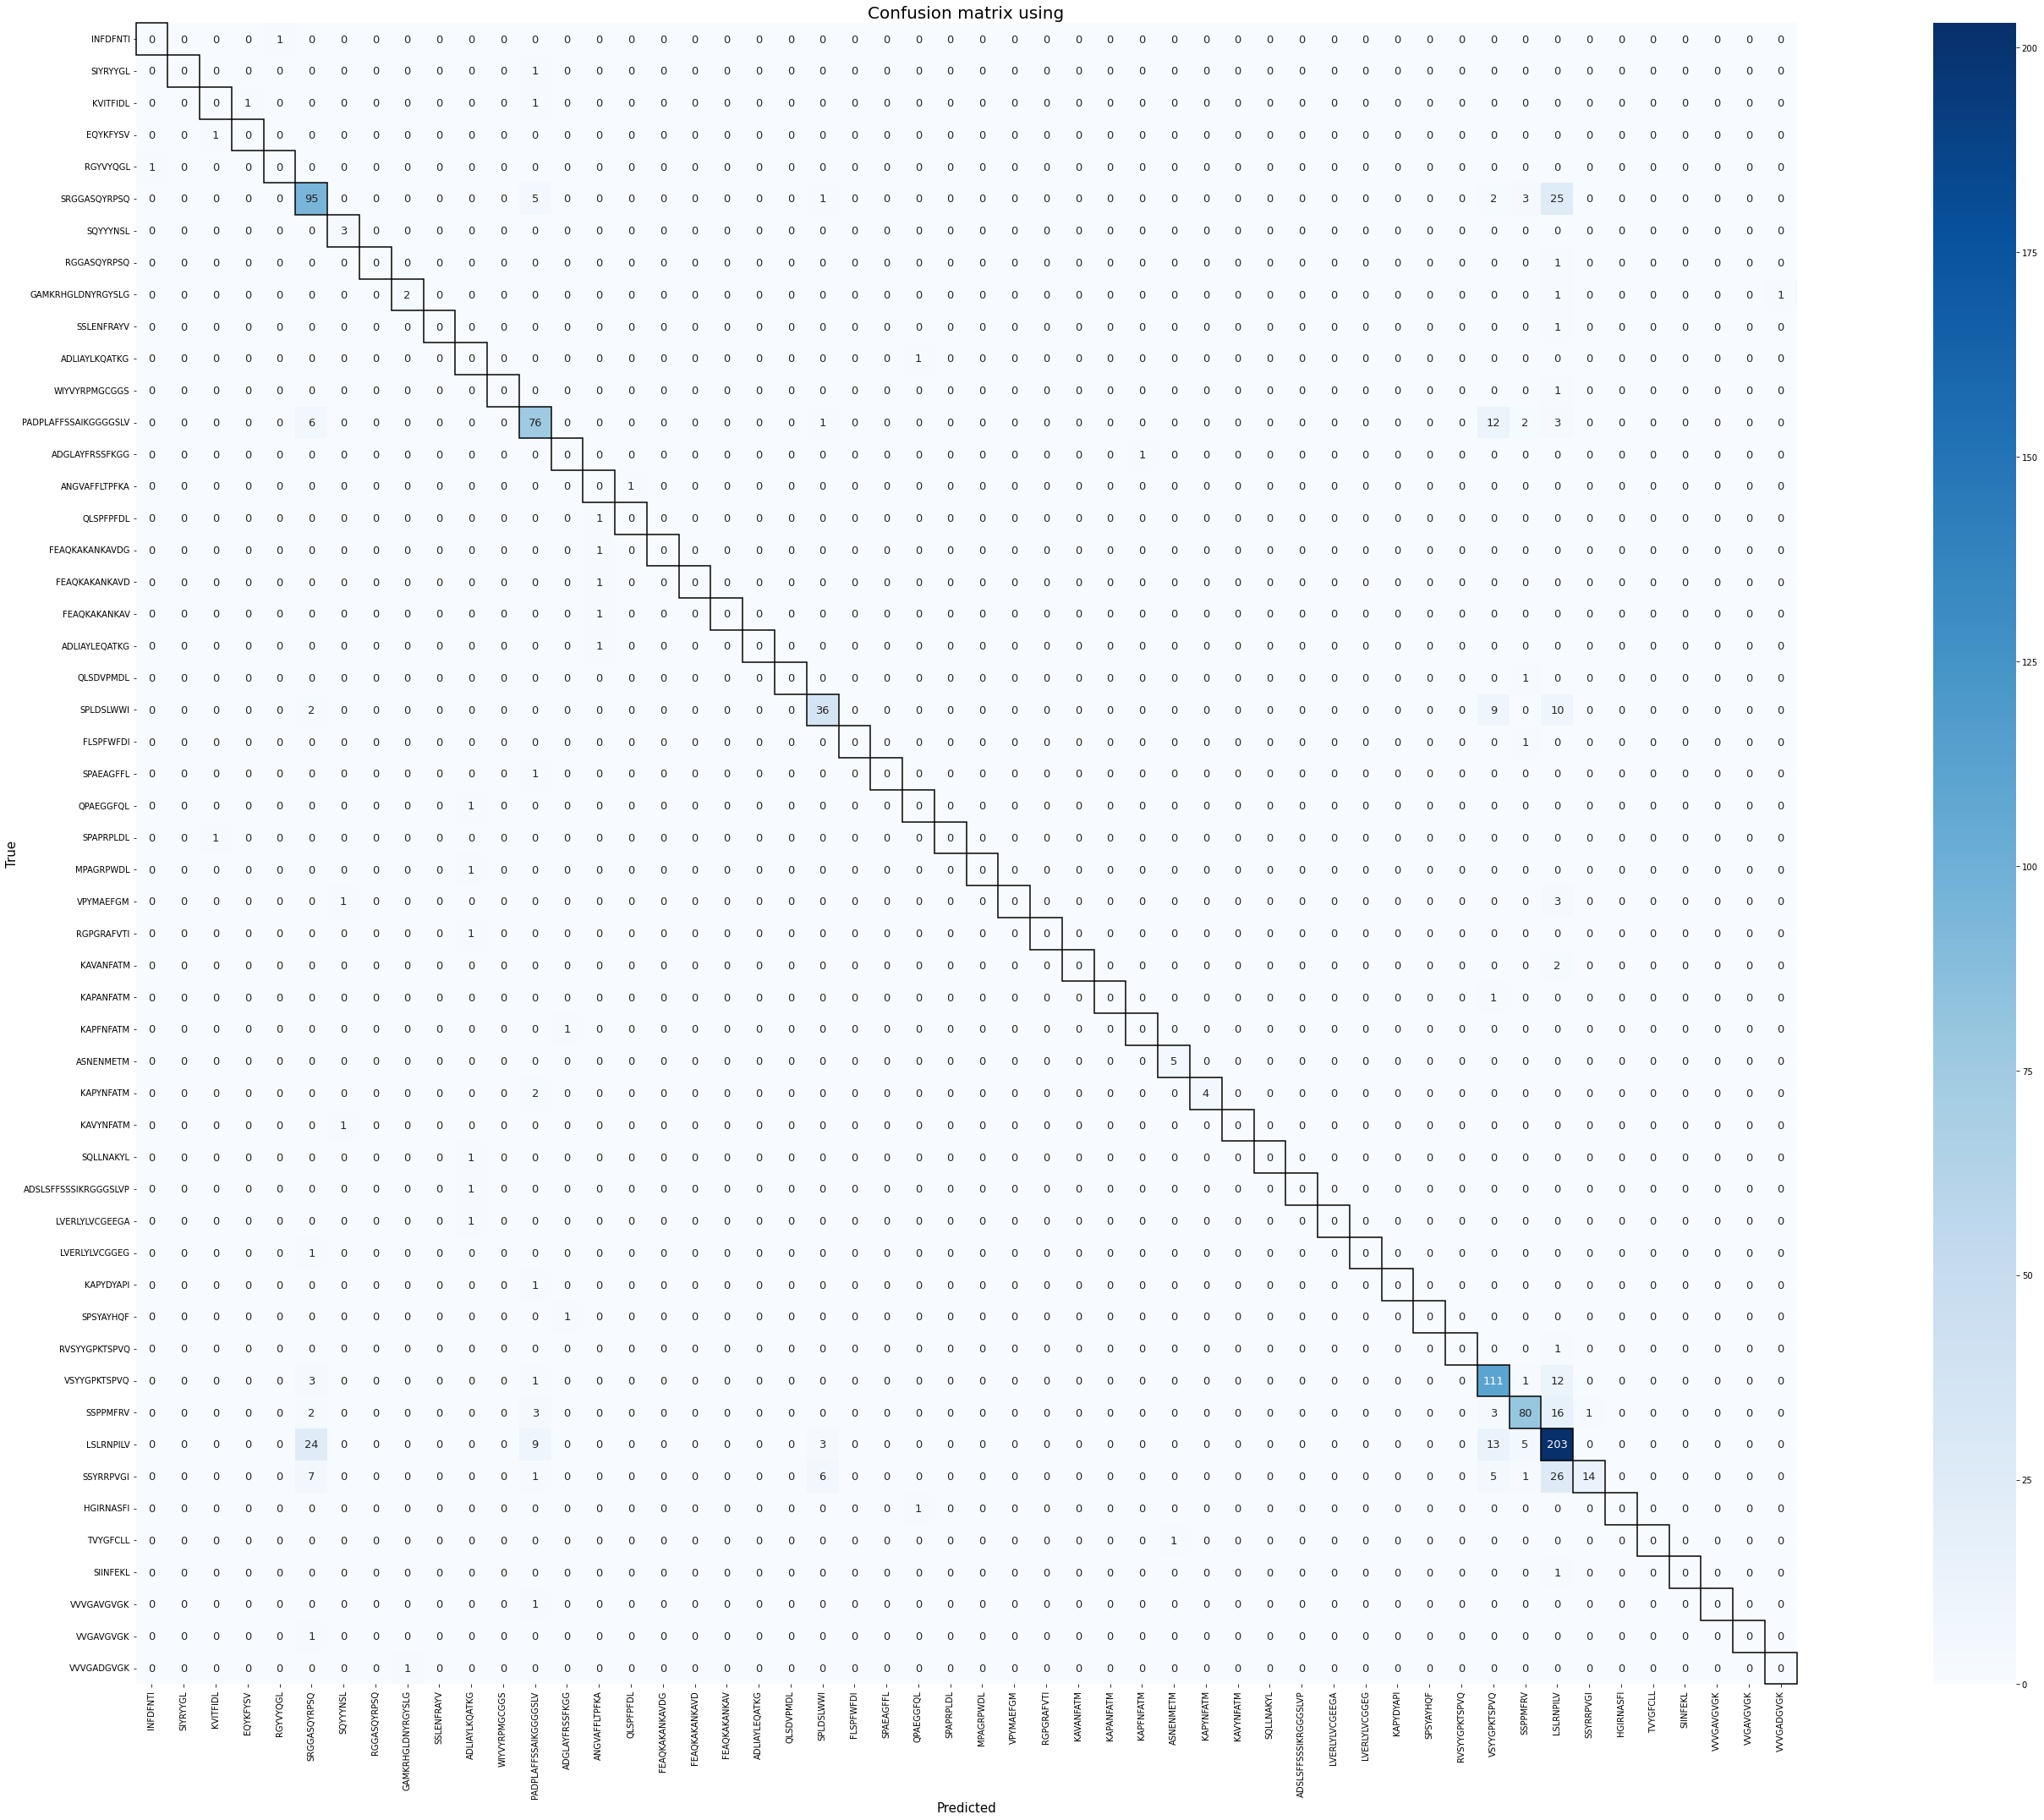

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\3484728906.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

   Accuracy    Recall Precision
0  0.707182  0.310091  0.318461
1  0.718232  0.311769  0.329937
2       0.7  0.327243  0.352384
3  0.694444  0.358473  0.379503
4  0.705556  0.372892  0.400416


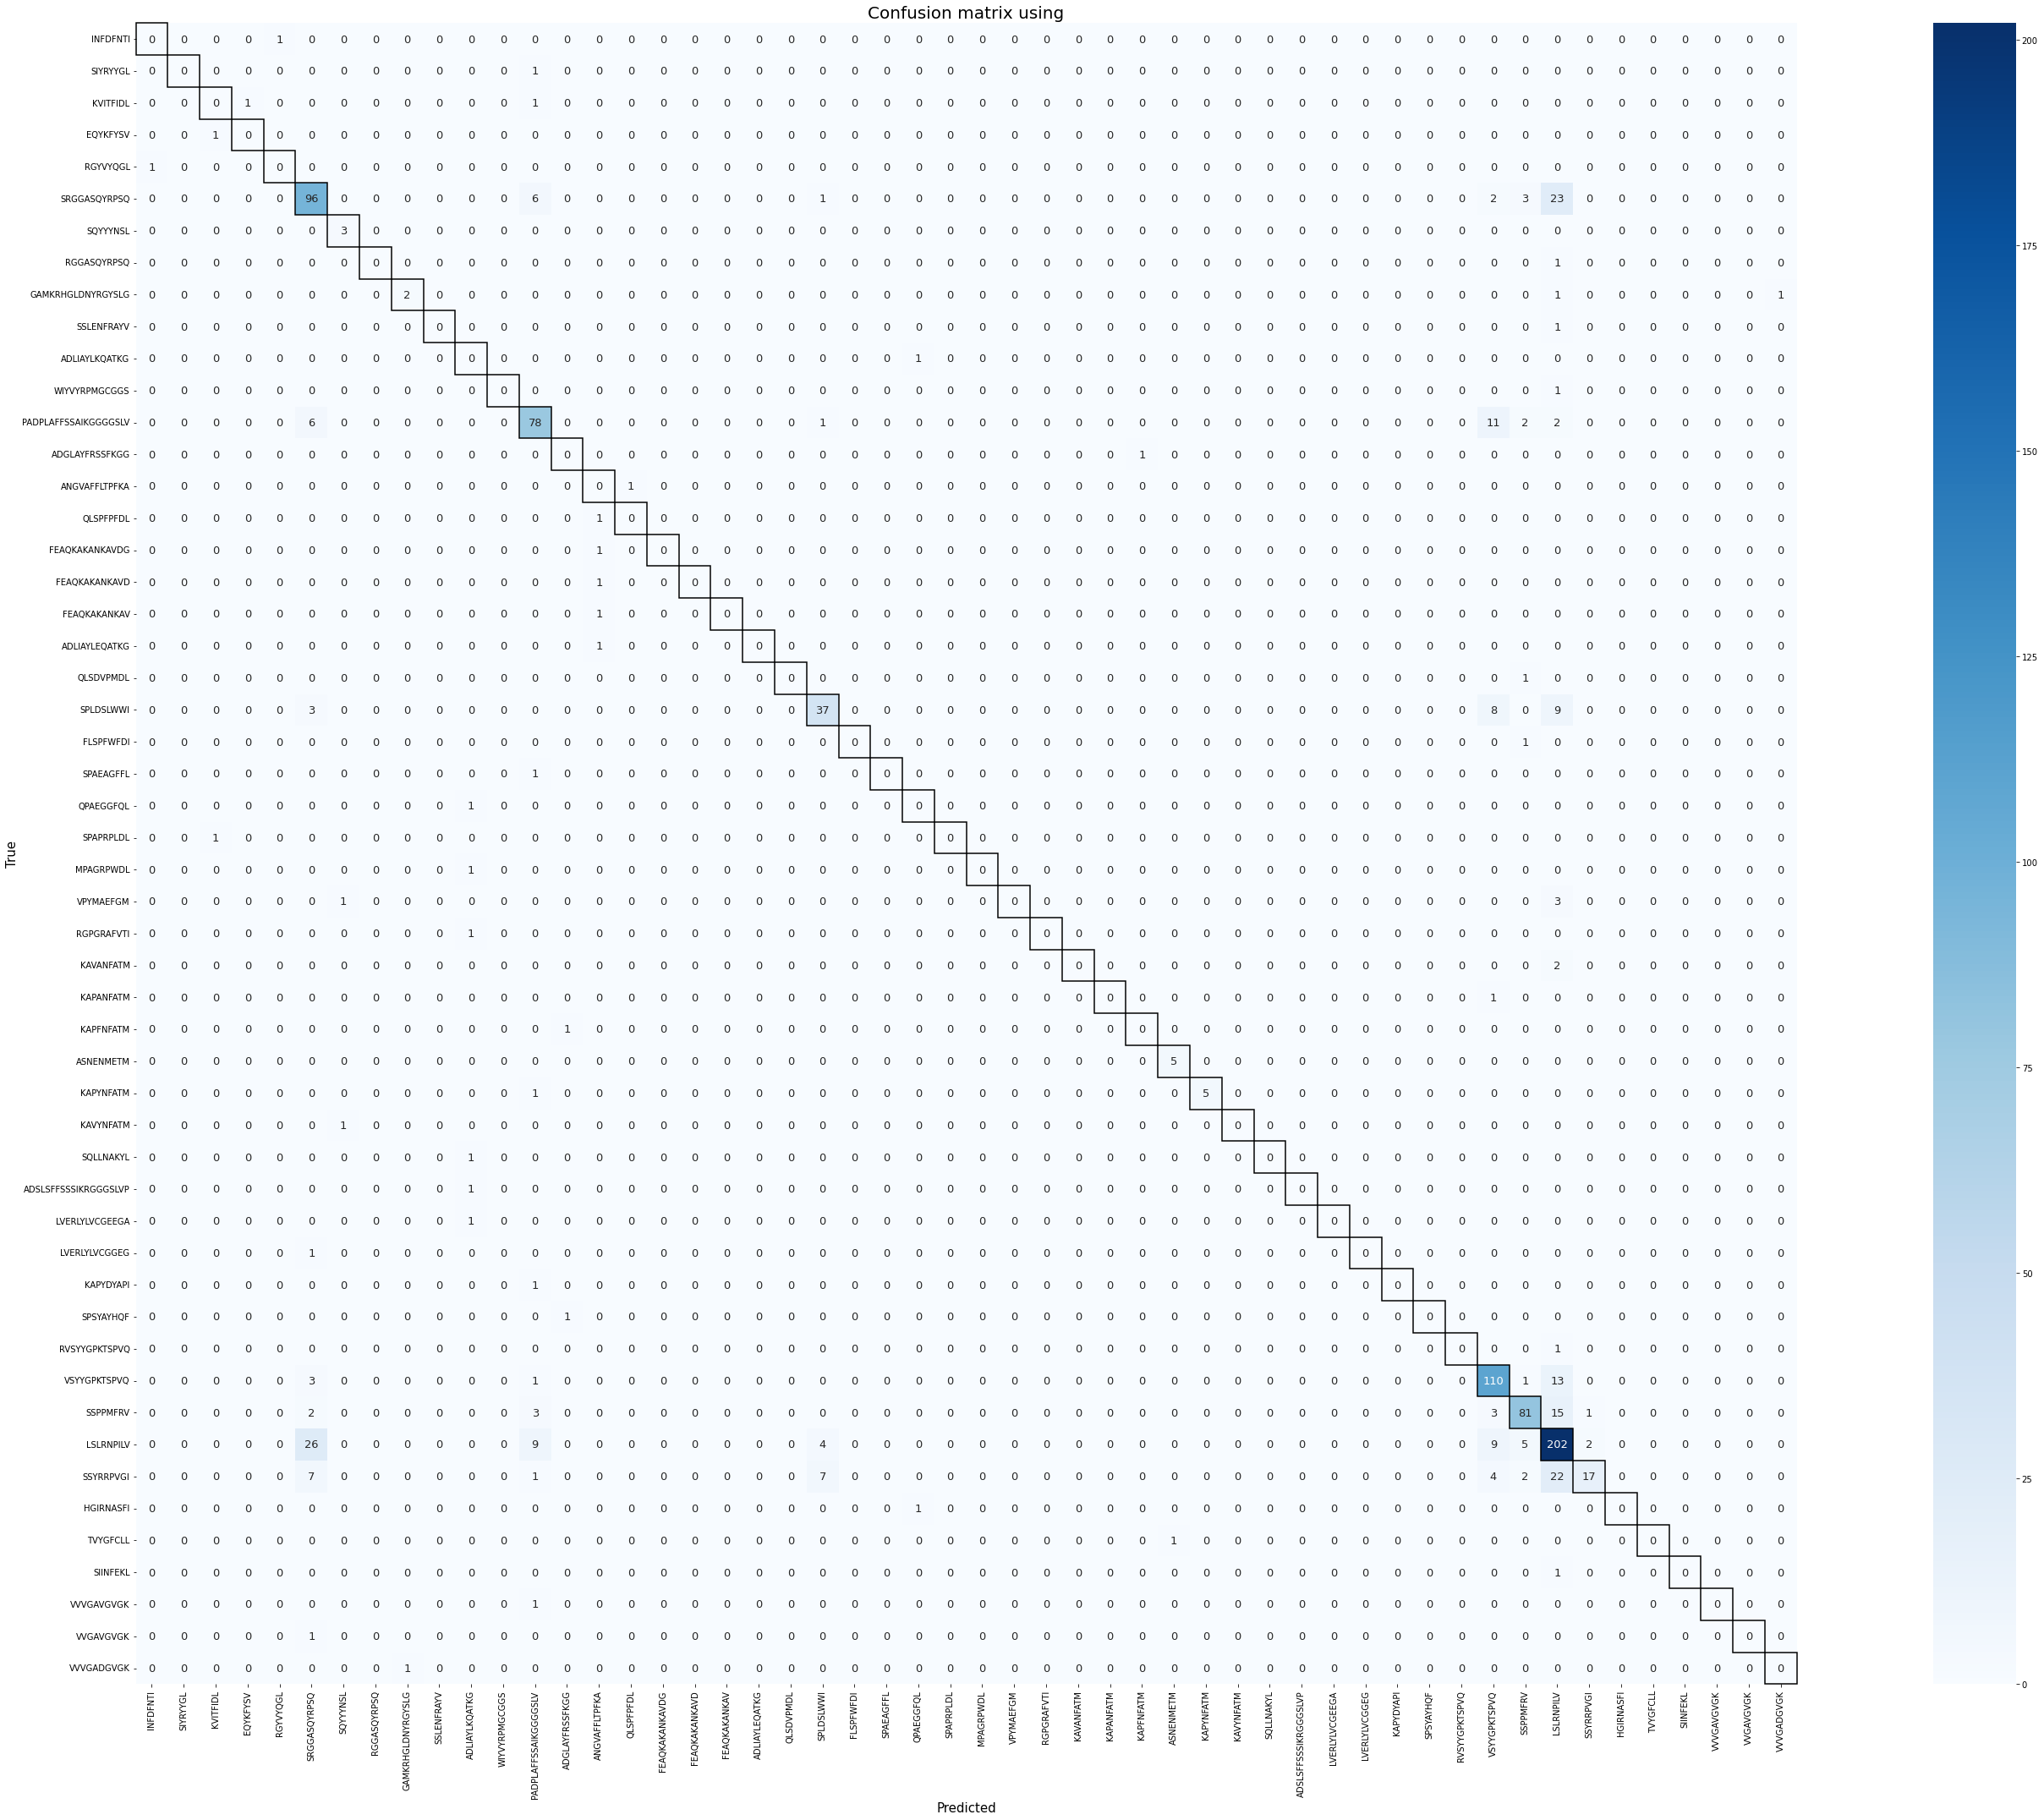

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\3484728906.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

   Accuracy    Recall Precision
0  0.701657  0.304435  0.323329
1  0.723757  0.312538  0.340287
2       0.7  0.325777  0.352804
3  0.672222  0.330084  0.334219
4  0.688889  0.365722  0.400241


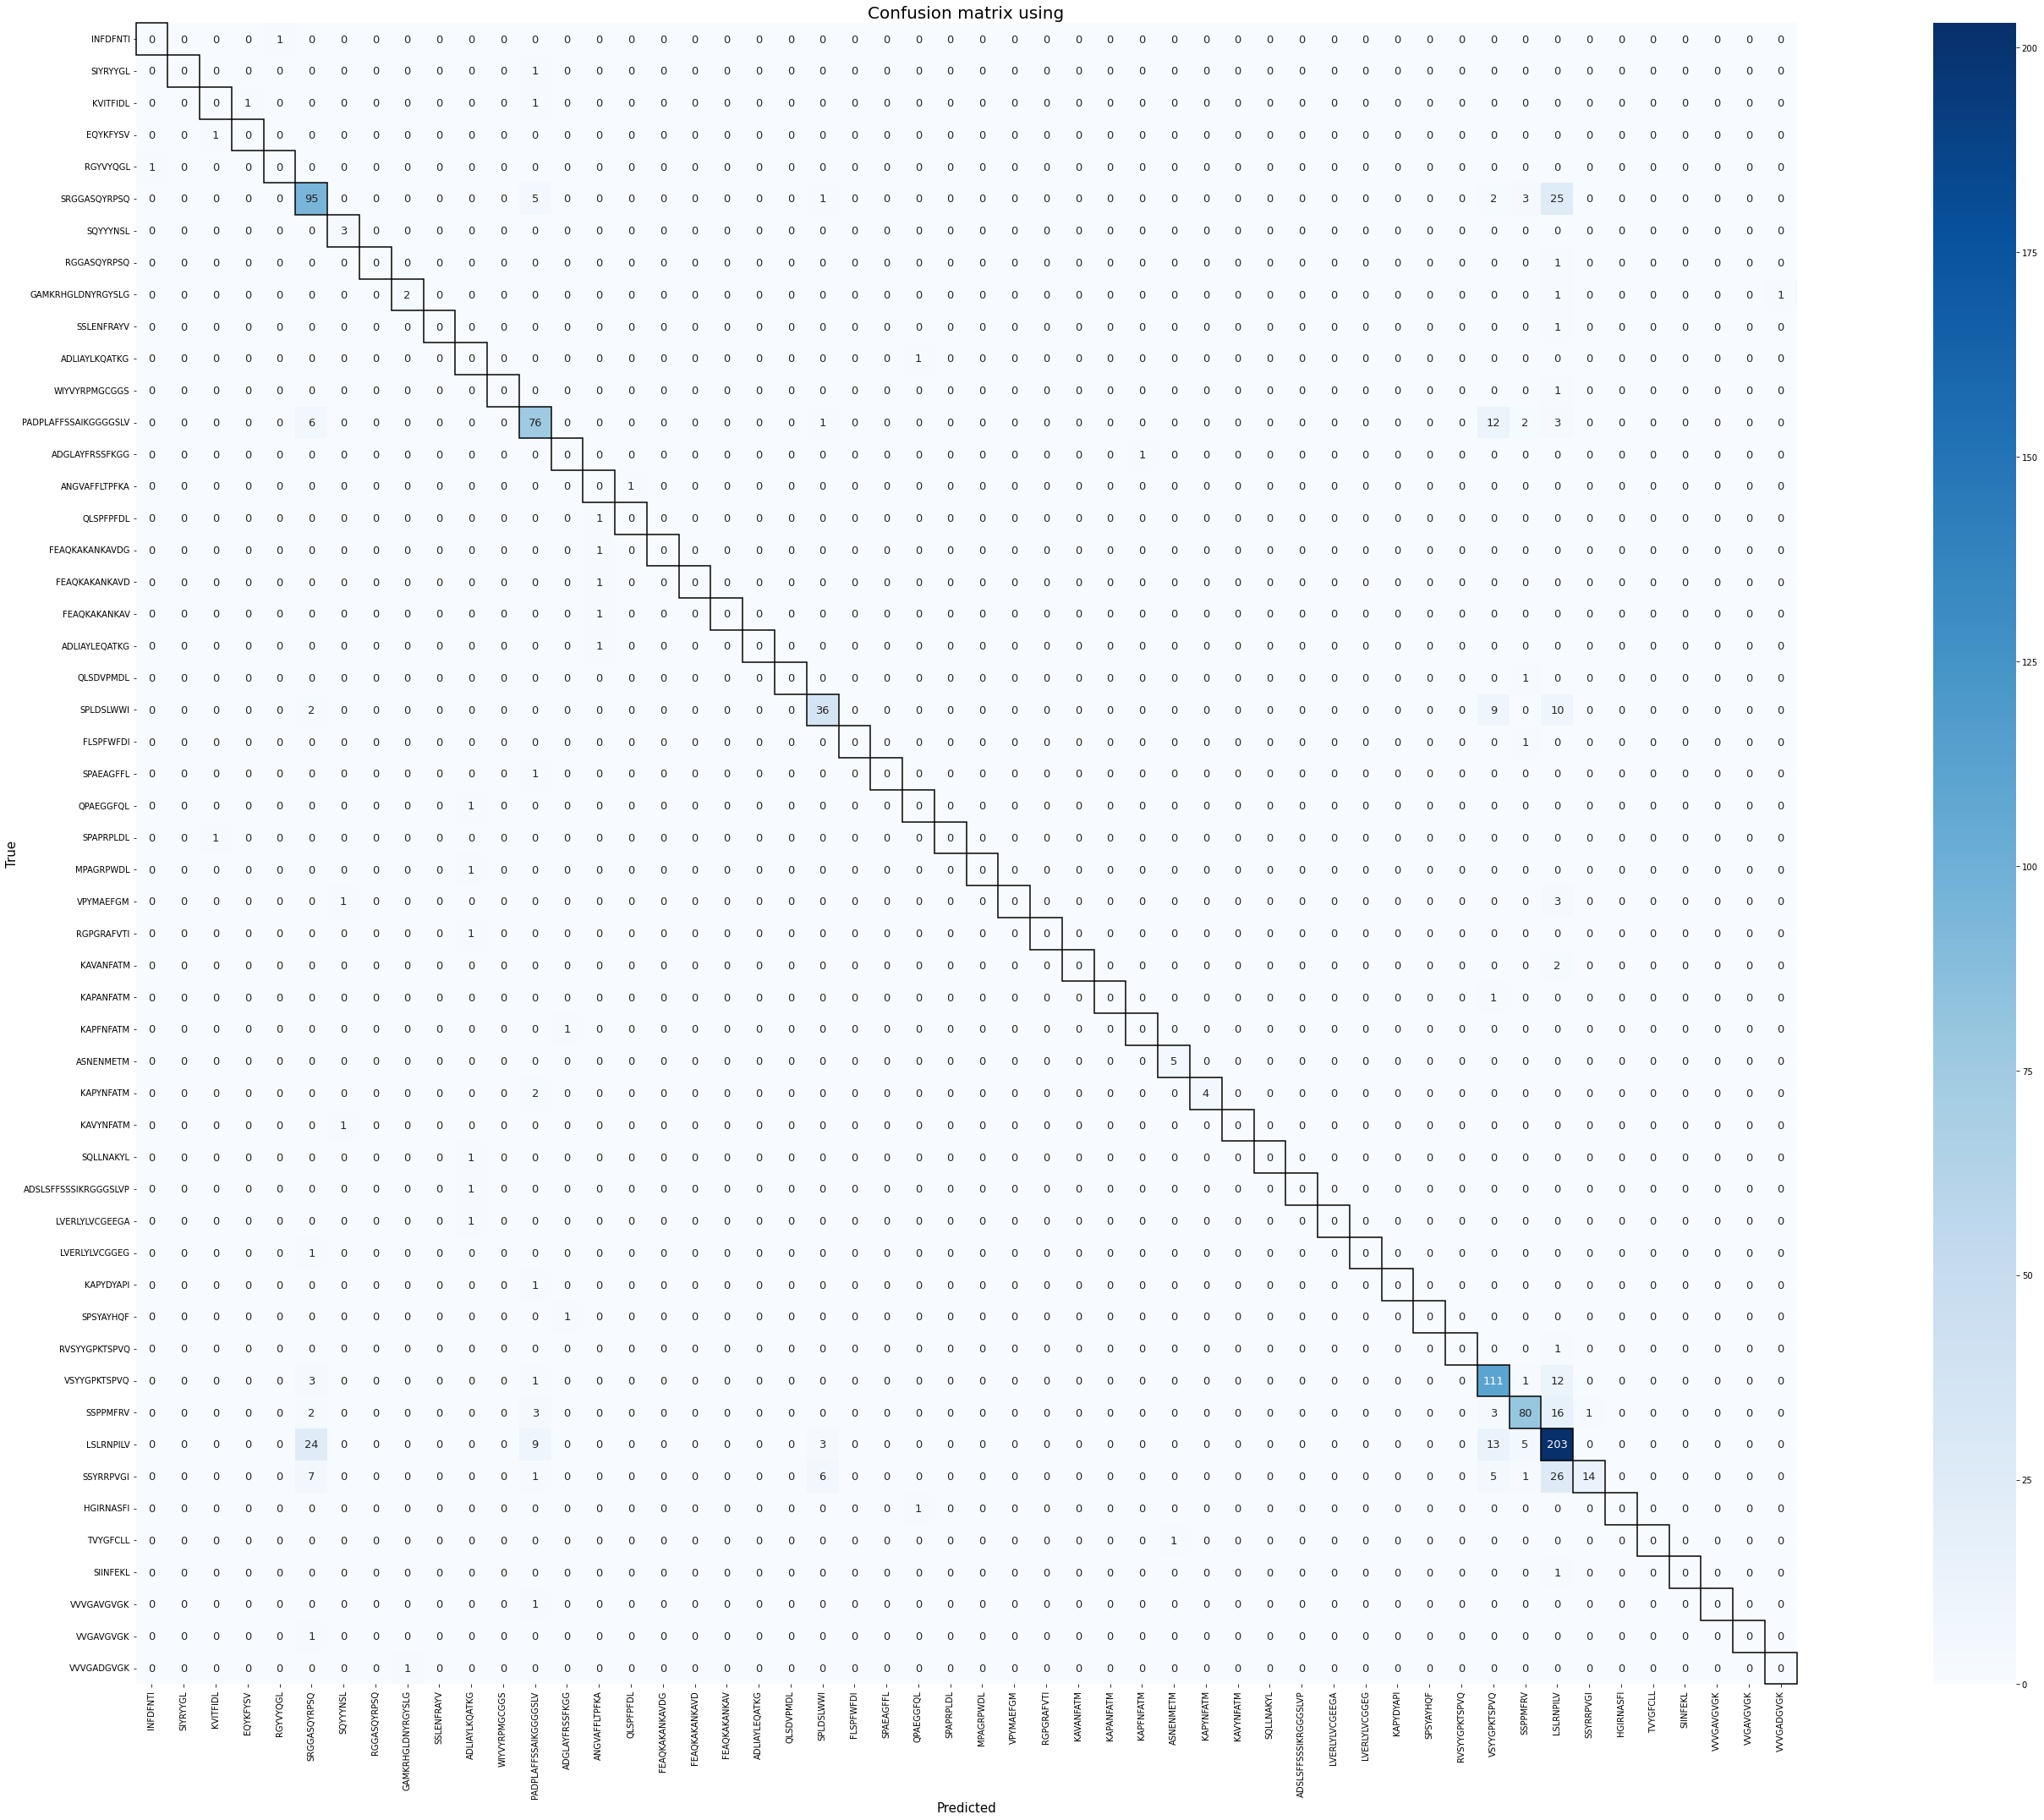

In [270]:
distance_values = [trm_alpha_beta_pwseqdist, trm_alpha_beta_hamming_metric, trm_alpha_beta_nw_metric]

for distance in distance_values:
    X = pd.DataFrame(distance)
    Y = tr_mouse_alpha_beta_pwseqdist.clone_df['epitope'].copy()
    metrics_cv_df = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision'])
    auc_cv_df = pd.DataFrame(columns=Y.unique())
    recall_cv_df = pd.DataFrame(columns=Y.unique())
    precision_cv_df = pd.DataFrame(columns=Y.unique())

    preds_df = pd.DataFrame(columns=['y_true', 'y_pred'], index=Y.index)

    kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    kfolds.get_n_splits(X)

    for train_ind, test_ind in kfolds.split(X, Y):
        X_train, X_test = X.iloc[train_ind, train_ind], X.iloc[test_ind, train_ind]
        Y_train, Y_test = Y.iloc[train_ind], Y.iloc[test_ind]
        model = KNeighborsClassifier(n_neighbors=100, metric='precomputed', weights='distance') 
        model.fit(X_train, Y_train)

        preds_labels = model.predict(X_test)
        preds_prob = model.predict_proba(X_test)
        preds_df.loc[Y_test.index, 'y_true'] = Y_test.loc[Y_test.index].values
        preds_df.loc[Y_test.index, 'y_pred'] = preds_labels

        Y_test_matrix = OneHotEncoder(categories=[model.classes_],handle_unknown='ignore').fit_transform(Y_test.values.reshape(-1, 1)).toarray()

        accuracy_fold = accuracy_score(Y_test, preds_labels)
        precision_fold = precision_score(Y_test, preds_labels, average='macro')
        recall_fold = recall_score(Y_test, preds_labels, average='macro')

        metrics_cv_df = metrics_cv_df.append(pd.Series({'Accuracy': accuracy_fold, 
                                                        'Recall': recall_fold, 'Precision': precision_fold}), ignore_index=True)
        recall_epitopes = recall_score(Y_test, preds_labels, average=None)

        precision_epitopes = precision_score(Y_test, preds_labels, average=None)

    print(metrics_cv_df)
    
    epitopes = list(preds_df['y_true'].unique())
    
    conf_mat_dash = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred']), columns=epitopes, index=epitopes)
    conf_mat_dash_norm = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred'], normalize='true'), columns=epitopes, index=epitopes) 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(45,30))
    sns.set_context(font_scale=1.3)
    sns.heatmap(conf_mat_dash, annot=True, cmap='Blues', fmt='', ax=axes, square=True, annot_kws={"size": 13}, vmin=0)
    axes.set_xlabel('Predicted', fontsize=15)
    axes.set_ylabel('True', fontsize=15)
    axes.set_title('Confusion matrix using', fontsize=20)

    for epi_ind in range(conf_mat_dash.shape[0]):
        axes.add_patch(Rectangle((epi_ind, epi_ind), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))

    plt.tight_layout()
    plt.show() 


Human TCRs Classification

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\141418094.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

   Accuracy    Recall Precision
0  0.513369  0.169061  0.169764
1  0.510695  0.174007  0.172286
2  0.513369  0.164726  0.180812
3  0.509383  0.195313  0.198609
4  0.495979  0.147125  0.147564


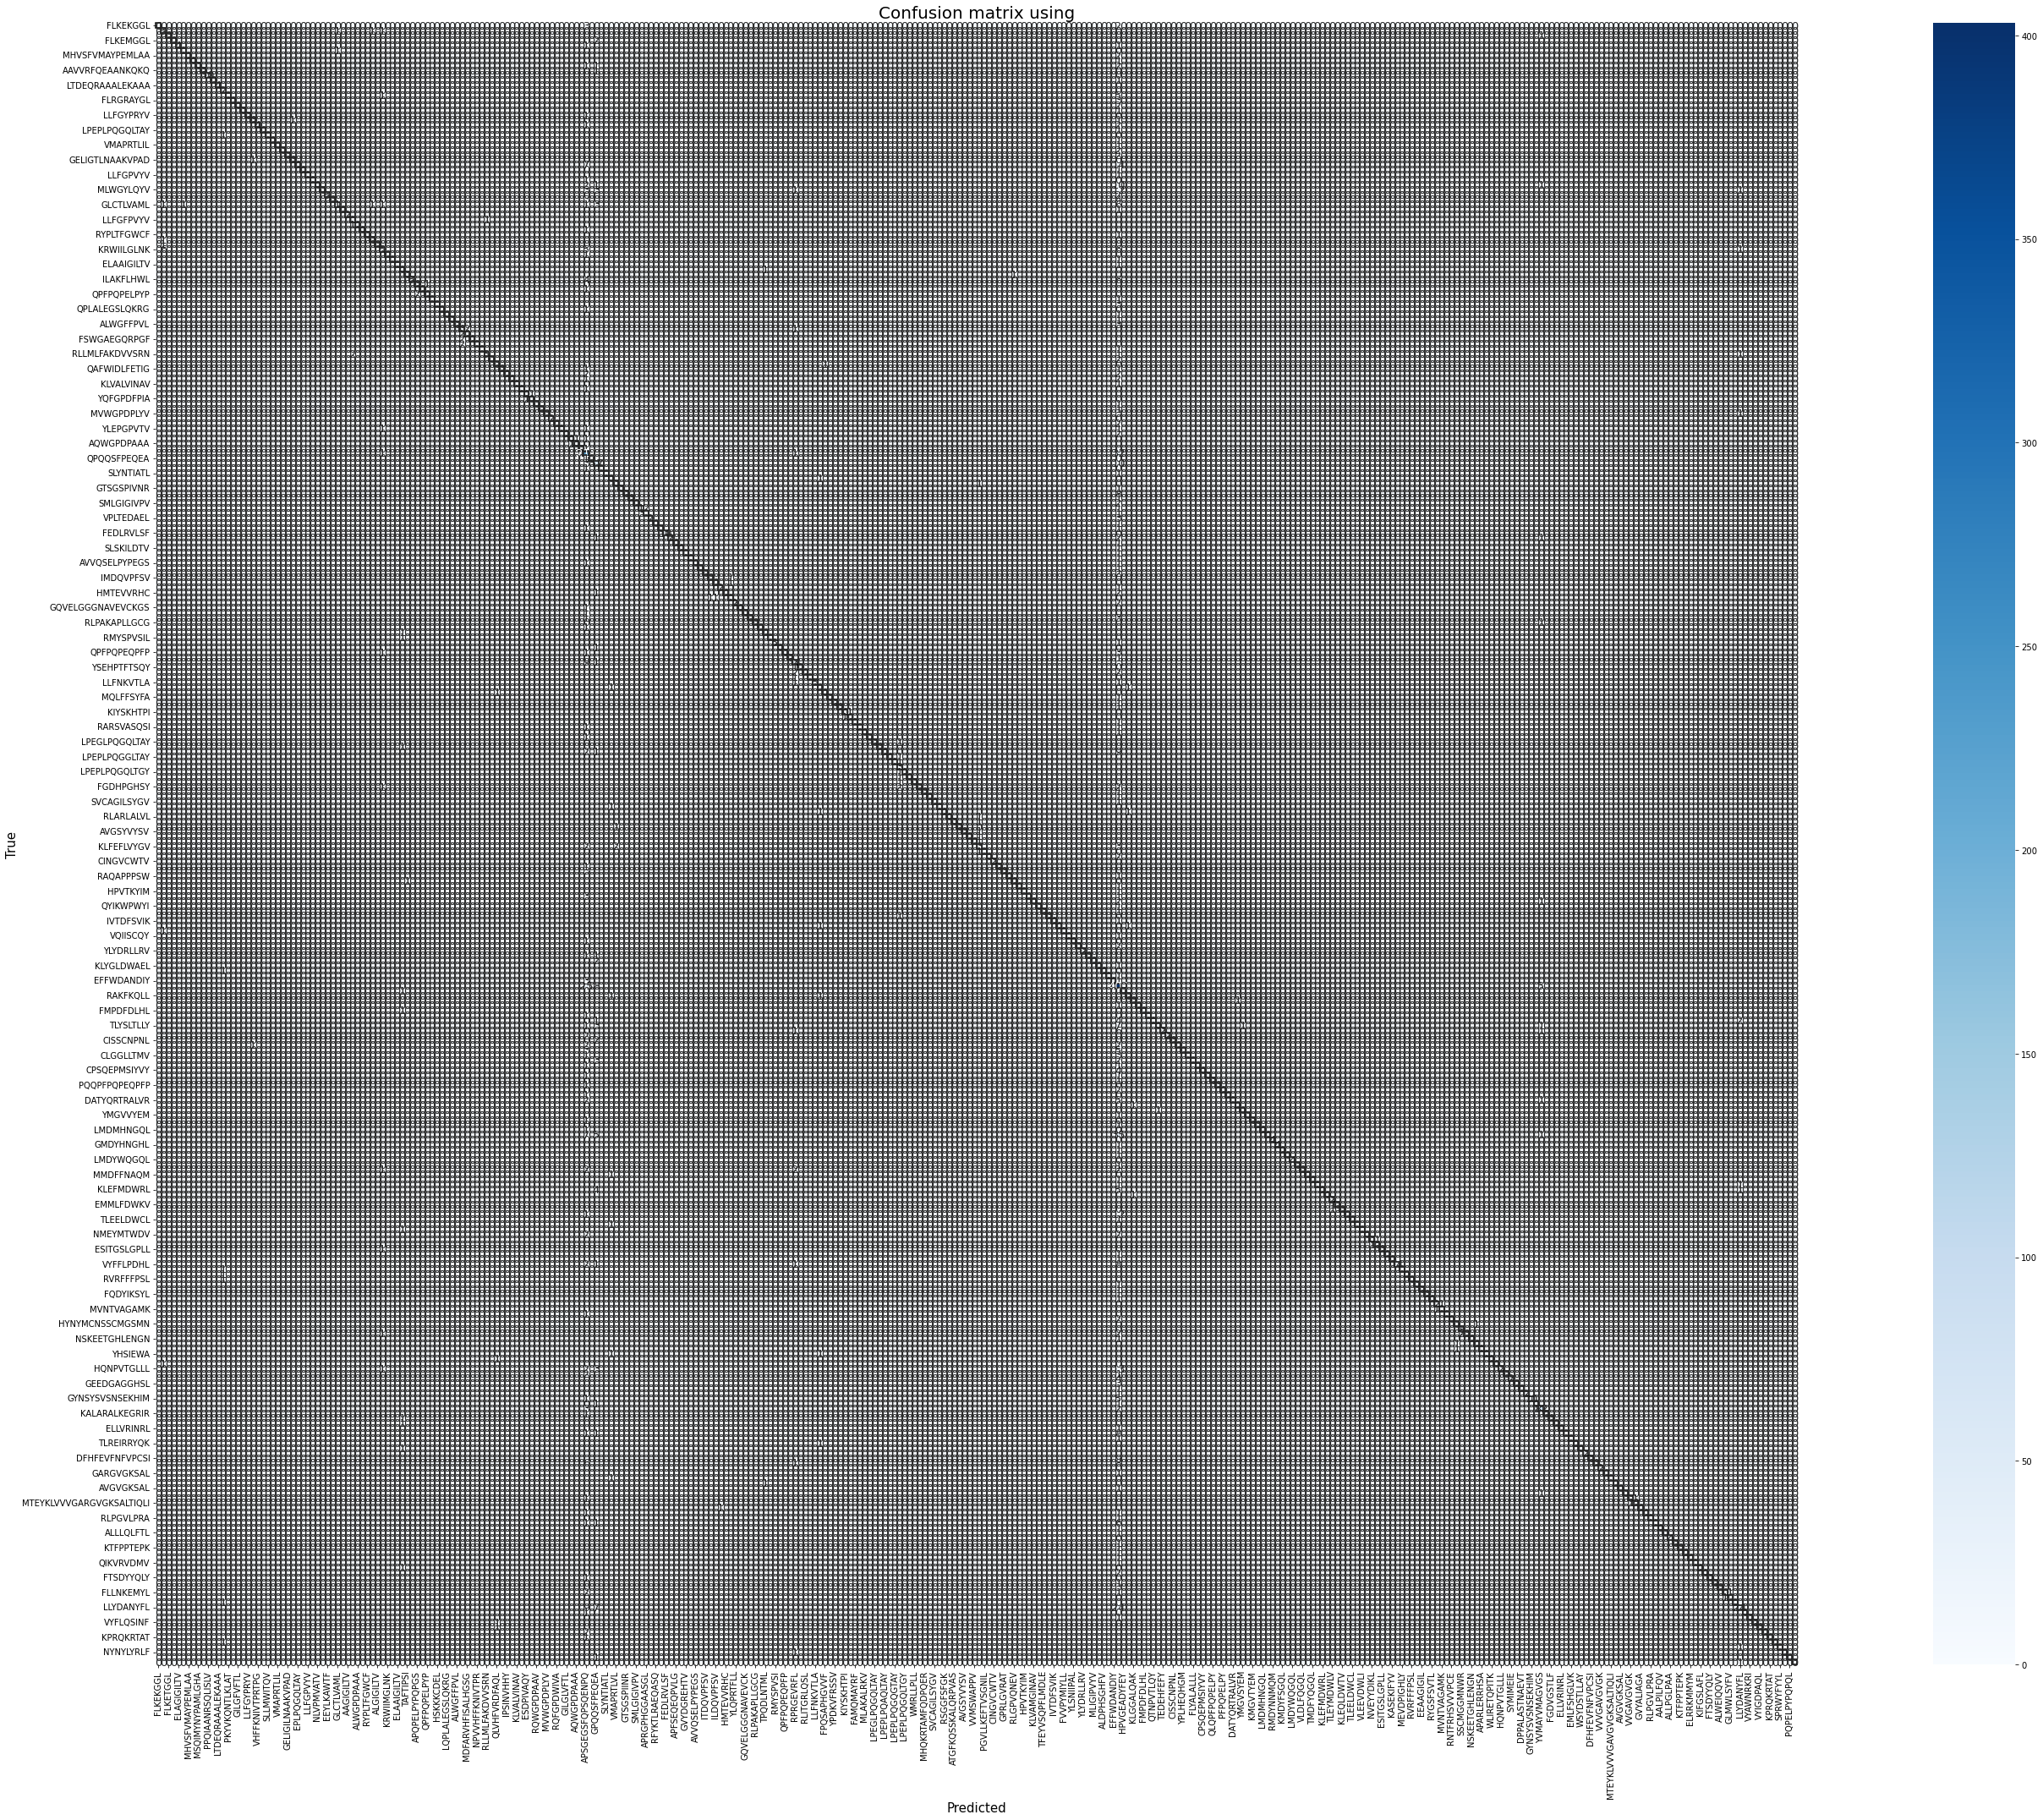

C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bayan Alsaghier\AppData\Local\Temp\ipykernel_19940\141418094.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

   Accuracy    Recall Precision
0  0.513369  0.177229   0.17418
1  0.508021  0.178456  0.173422
2  0.529412  0.164402  0.174044
3  0.525469  0.204182  0.197962
4  0.485255  0.153092   0.14795


KeyboardInterrupt: 

In [272]:
distance_values = [trh_alpha_beta_pwseqdist, trh_alpha_beta_hamming_metric, trh_alpha_beta_nw_metric]

for distance in distance_values:
    X = pd.DataFrame(distance)
    Y = tr_human_alpha_beta_pwseqdist.clone_df['epitope'].copy()
    metrics_cv_df = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision'])
    auc_cv_df = pd.DataFrame(columns=Y.unique())
    recall_cv_df = pd.DataFrame(columns=Y.unique())
    precision_cv_df = pd.DataFrame(columns=Y.unique())

    preds_df = pd.DataFrame(columns=['y_true', 'y_pred'], index=Y.index)

    kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    kfolds.get_n_splits(X)

    for train_ind, test_ind in kfolds.split(X, Y):
        X_train, X_test = X.iloc[train_ind, train_ind], X.iloc[test_ind, train_ind]
        Y_train, Y_test = Y.iloc[train_ind], Y.iloc[test_ind]
        model = KNeighborsClassifier(n_neighbors=100, metric='precomputed', weights='distance') 
        model.fit(X_train, Y_train)

        preds_labels = model.predict(X_test)
        preds_prob = model.predict_proba(X_test)
        preds_df.loc[Y_test.index, 'y_true'] = Y_test.loc[Y_test.index].values
        preds_df.loc[Y_test.index, 'y_pred'] = preds_labels

        Y_test_matrix = OneHotEncoder(categories=[model.classes_],handle_unknown='ignore').fit_transform(Y_test.values.reshape(-1, 1)).toarray()

        accuracy_fold = accuracy_score(Y_test, preds_labels)
        precision_fold = precision_score(Y_test, preds_labels, average='macro')
        recall_fold = recall_score(Y_test, preds_labels, average='macro')

        metrics_cv_df = metrics_cv_df.append(pd.Series({'Accuracy': accuracy_fold, 
                                                        'Recall': recall_fold, 'Precision': precision_fold}), ignore_index=True)
        recall_epitopes = recall_score(Y_test, preds_labels, average=None)

        precision_epitopes = precision_score(Y_test, preds_labels, average=None)

    print(metrics_cv_df)
    
    epitopes = list(preds_df['y_true'].unique())
    
    conf_mat_dash = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred']), columns=epitopes, index=epitopes)
    conf_mat_dash_norm = pd.DataFrame(confusion_matrix(preds_df['y_true'], preds_df['y_pred'], normalize='true'), columns=epitopes, index=epitopes) 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(45,30))
    sns.set_context(font_scale=1.3)
    sns.heatmap(conf_mat_dash, annot=True, cmap='Blues', fmt='', ax=axes, square=True, annot_kws={"size": 13}, vmin=0)
    axes.set_xlabel('Predicted', fontsize=15)
    axes.set_ylabel('True', fontsize=15)
    axes.set_title('Confusion matrix using', fontsize=20)

    for epi_ind in range(conf_mat_dash.shape[0]):
        axes.add_patch(Rectangle((epi_ind, epi_ind), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))

    plt.tight_layout()
    plt.show() 
